In [4]:
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

# Test Koopman operater in numpy

In [5]:
file_name = 'newnew_unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
x = np.array([.1,.1,0.3])
nonlinear_x = x
u = np.array([0.5,0.3])
lifted_x = operater.encode(x)
for i in range(5):
    next_lifted_x = operater.linear(lifted_x,u)
    nonlinear_x = discrete_nonlinear(nonlinear_x,u,0.1)
next_x = operater.decode(next_lifted_x)
print(next_x,nonlinear_x)
operater.property()

[0.14576261 0.12515234 0.32710256] [[0.33376368 0.18798932 0.45      ]]
The system is controllable.


In [6]:
file_name = 'newnew_unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
A,B = operater.linear_matrix()
print(A)

[[ 1.00493824e+00 -1.06460983e-02 -8.63089153e-05  4.19450030e-02
  -5.19815460e-03 -4.90116095e-03  9.68542136e-03 -1.52511492e-01
   3.03379819e-02  6.88124746e-02  6.24686368e-02]
 [-1.43866660e-03  1.01267827e+00  8.27280711e-03  1.93732947e-01
  -1.63389757e-01  8.23331624e-02  6.42161593e-02  1.05091192e-01
   2.88880229e-01 -5.97685799e-02 -1.84435487e-01]
 [-8.71501025e-03  1.09735755e-02  9.94444072e-01 -2.50838369e-01
   1.29439890e-01  3.97230573e-02 -1.55725971e-01  2.11073294e-01
  -2.68983245e-01 -1.04371555e-01  1.33916587e-01]
 [ 3.76493181e-03  1.15479939e-02 -1.44164255e-02  3.14485580e-01
   3.70251715e-01  4.12123837e-02 -4.37958129e-02  1.01388693e-01
   1.99879892e-02  1.00508727e-01 -6.51753088e-03]
 [ 1.09393392e-02  9.10447445e-03  1.29327951e-02  4.42575067e-01
   6.48735106e-01  4.19968553e-02  1.50915161e-02  1.44489616e-01
   4.83238474e-02  1.22478366e-01 -1.76421460e-02]
 [ 4.93674364e-04 -2.29091756e-03 -2.56545469e-02  1.52178556e-01
   1.11941978e-01 -

In [7]:
Ae = np.linalg.eigvals(A)
print(Ae)

[-0.4385396 +0.j         -0.57685316+0.j         -0.5366118 +0.j
 -0.01473735+0.j         -0.12707312+0.1079601j  -0.12707312-0.1079601j
 -0.21182403+0.j          0.9994533 +0.00037098j  0.9994533 -0.00037098j
  1.0003072 +0.j          0.99990046+0.j        ]


# Test MPC function

In [8]:
# get augmented matrices
A,B = operater.linear_matrix()
Q = np.diag(np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.]))
R = np.diag(np.array([1.,2.]))
rho = 1.
Gamma,Theta,Qbig,H = get_Augmented_Matrix(A,B,Q,R,rho,3,2)
print(Gamma.shape)
print(Theta.shape)
print(Qbig.shape)
print(H.shape)

TypeError: get_Augmented_Matrix() takes 6 positional arguments but 7 were given

In [1]:
#%matplotlib notebook
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

In [2]:
SimLength = 30
init_x = np.array([0.,0.,0.])
path=simulate_path(init_x,SimLength)

./dataset/MPC/SimLenth_30_Ts_0.1


[ 0.          0.          0.          0.          0.          0.
  0.05        0.1         0.15        0.2         0.25        0.3
  0.35        0.4         0.45        0.5         0.55        0.6
  0.65        0.7         0.75        0.78539816  0.78539816  0.78539816
  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816
  0.78539816  0.78539816  0.73539816  0.68539816  0.63539816  0.58539816
  0.53539816  0.48539816  0.43539816  0.38539816  0.33539816  0.28539816
  0.23539816  0.18539816  0.13539816  0.08539816  0.03539816  0.
  0.          0.          0.          0.         -0.05       -0.1
 -0.15       -0.2        -0.25       -0.3        -0.35       -0.4
 -0.45       -0.5        -0.55       -0.6        -0.65       -0.7
 -0.75       -0.78539816 -0.78539816 -0.78539816 -0.78539816 -0.78539816
 -0.78539816 -0.78539816 -0.78539816 -0.78539816 -0.78539816 -0.78539816
 -0.78539816 -0.78539816 -0.78539816 -0.78539816 -0.78539816 -0.78539816
 -0.78539816 -0.78539816 -0.7

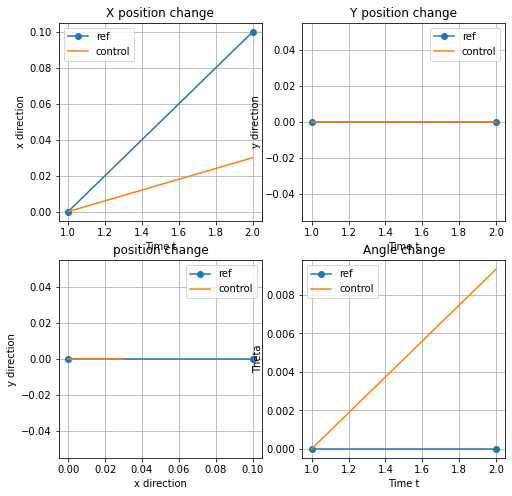

Point 2 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.2 0.  0. ]
0.14125722886364867 [0.2 0.  0. ] [0.05999859 0.00028028 0.0187918 ] [0.299999   0.09449024]


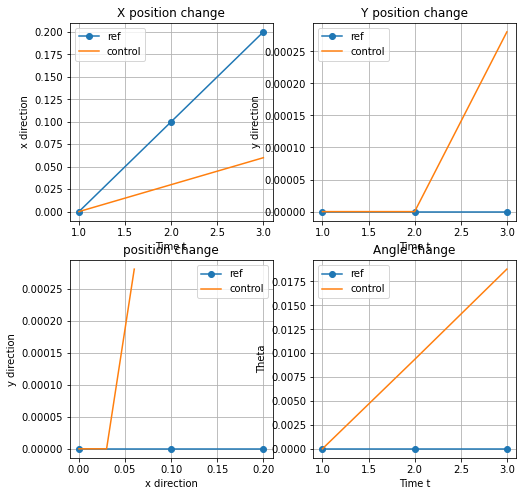

Point 3 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.3 0.  0. ]
0.21168060363130162 [0.3 0.  0. ] [0.08999311 0.000844   0.02655318] [0.29999815 0.07761385]
Point 3 ,Step 2 - MSE error in lifted space, ref, state x, input u:
[0.3 0.  0. ]
0.1822655272844413 [0.3 0.  0. ] [0.11998251 0.0016405  0.02849098] [0.29999981 0.01937802]


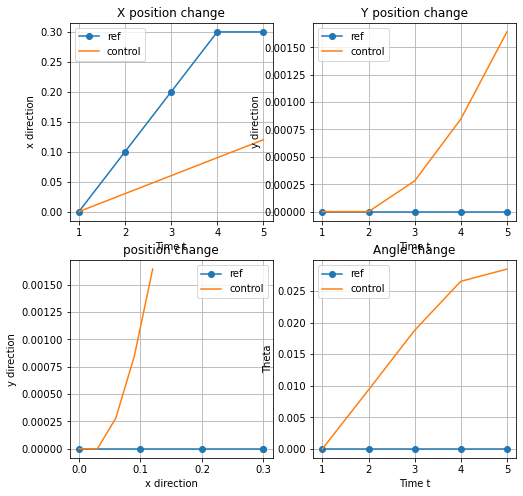

Point 4 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.4 0.  0. ]
0.2523704319384535 [0.4 0.  0. ] [0.14997034 0.00249511 0.03420204] [0.30000002 0.05711052]
Point 4 ,Step 2 - MSE error in lifted space, ref, state x, input u:
[0.4 0.  0. ]
0.22307756664190875 [0.4 0.  0. ] [0.17995284 0.00352097 0.03647532] [0.30000039 0.02273282]
Point 4 ,Step 3 - MSE error in lifted space, ref, state x, input u:
[0.4 0.  0. ]
0.1933500174115461 [0.4 0.  0. ] [0.20993288 0.00461499 0.035177  ] [ 0.3        -0.01298318]


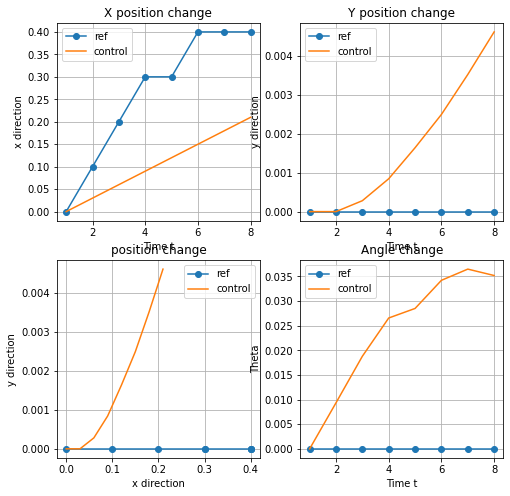

Point 5 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0. ]
0.2644542521620185 [0.5 0.  0. ] [0.23991434 0.00567008 0.04753261] [0.30000014 0.12355607]
Point 5 ,Step 2 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0. ]
0.23678497394699086 [0.5 0.  0. ] [0.26988045 0.00709552 0.05533328] [0.30000003 0.07800674]
Point 5 ,Step 3 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0. ]
0.20812895924466862 [0.5 0.  0. ] [0.29983454 0.00875468 0.05634543] [0.3       0.0101215]
Point 5 ,Step 4 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0. ]
0.17871274047180105 [0.5 0.  0. ] [0.32978693 0.01044414 0.05344786] [ 0.3        -0.02897568]


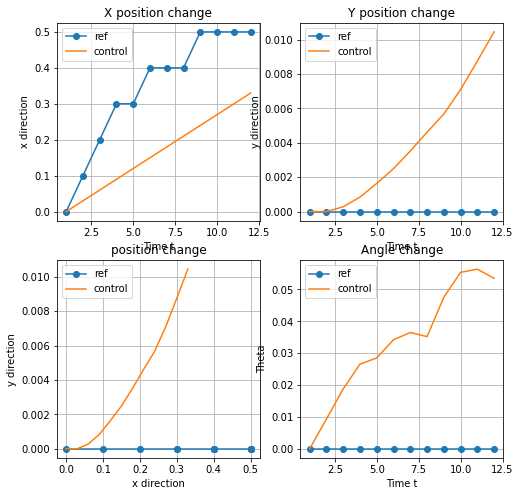

Point 6 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.05]
0.14306573901499073 [0.5  0.   0.05] [0.35974409 0.01204682 0.07551391] [0.3        0.22066045]


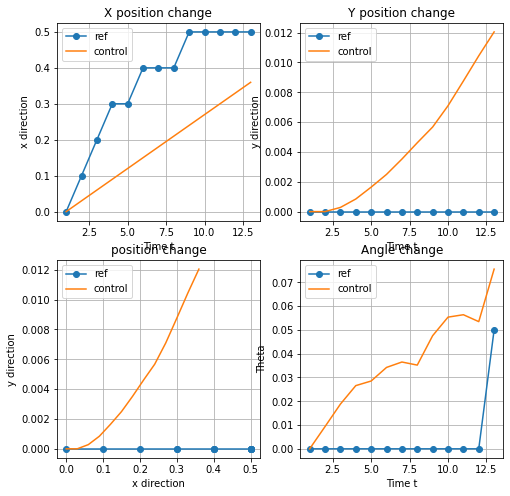

Point 7 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0.1]
0.11256735960279148 [0.5 0.  0.1] [0.38965861 0.01431008 0.11707072] [0.30000014 0.4155681 ]


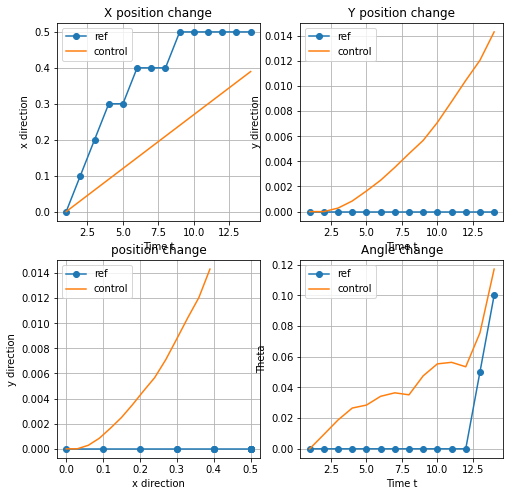

Point 8 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.15]
0.08390863617165628 [0.5  0.   0.15] [0.41945328 0.01781419 0.16534729] [0.30000016 0.48276568]


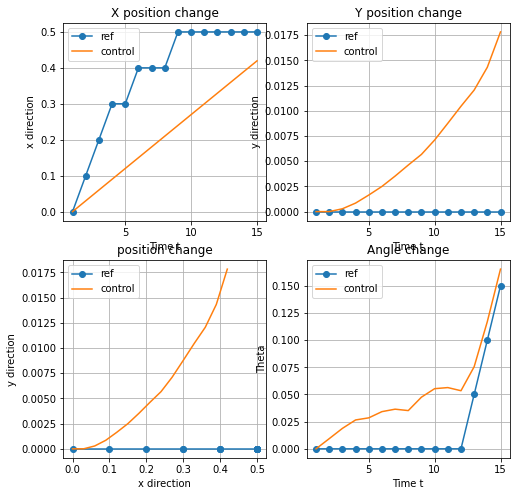

Point 9 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0.2]
0.057286383149496106 [0.5 0.  0.2] [0.44904413 0.02275204 0.21294503] [0.30000016 0.4759774 ]


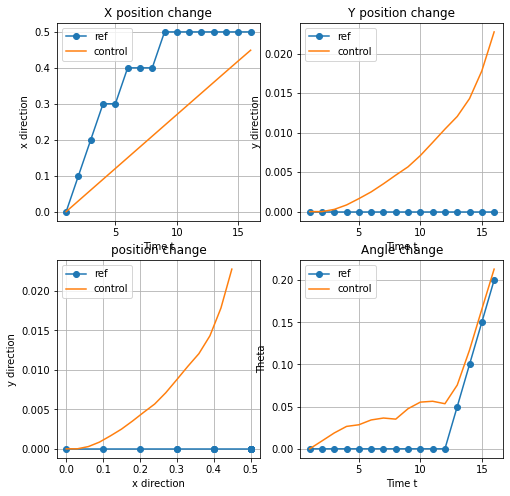

Point 10 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.25]
0.03729986895991087 [0.5  0.   0.25] [0.47836688 0.0290923  0.25877078] [0.30000379 0.45825757]


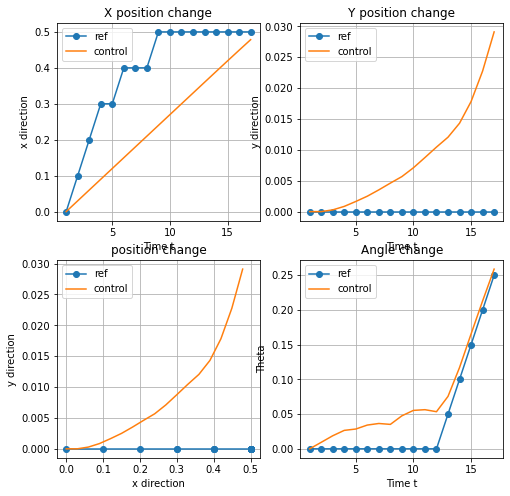

Point 11 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0.3]
0.03766836279451599 [0.5 0.  0.3] [0.50736804 0.03676907 0.30355709] [0.3        0.44786309]


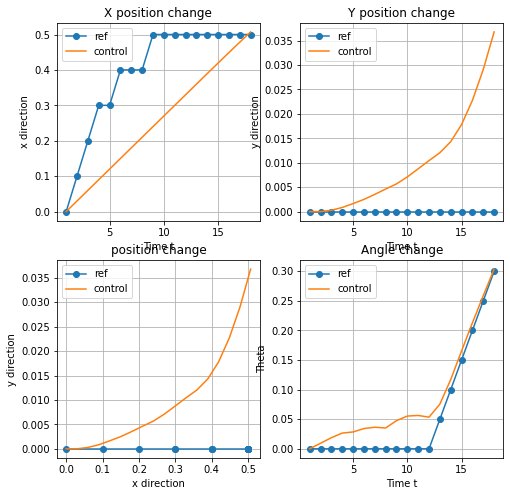

Point 12 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.35]
0.04583791192888949 [0.5  0.   0.35] [0.52055019 0.04089822 0.34752228] [0.13813727 0.43965192]


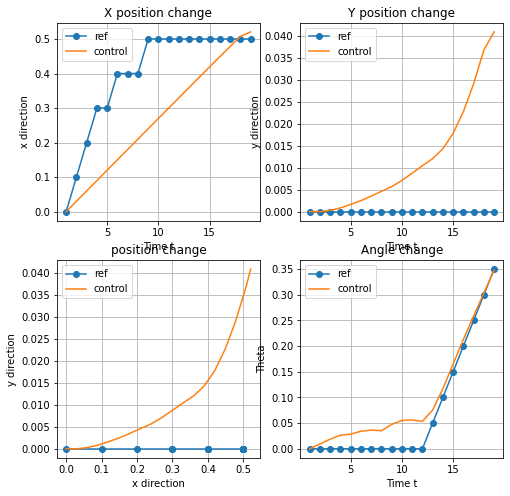

Point 13 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0.4]
0.04387390384900086 [0.5 0.  0.4] [0.51725608 0.03970502 0.39288253] [-0.03503555  0.45360241]


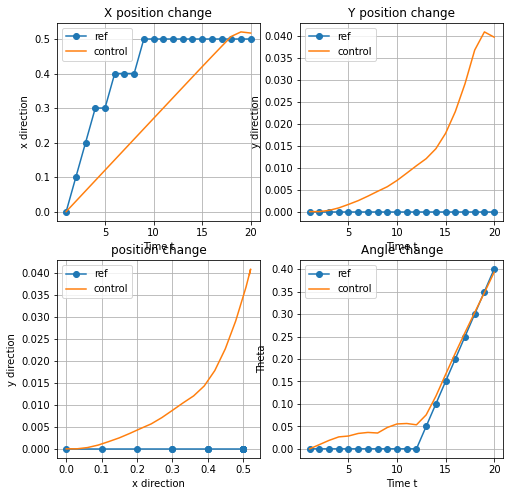

Point 14 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.45]
0.03766389063261124 [0.5  0.   0.45] [0.50816929 0.03593919 0.44224076] [-0.09836223  0.49358238]


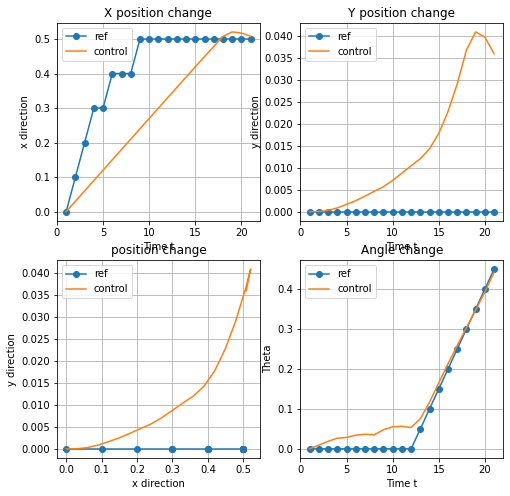

Point 15 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0.5]
0.03402990472048675 [0.5 0.  0.5] [0.50210302 0.03306669 0.49224076] [-0.06711995  0.5       ]


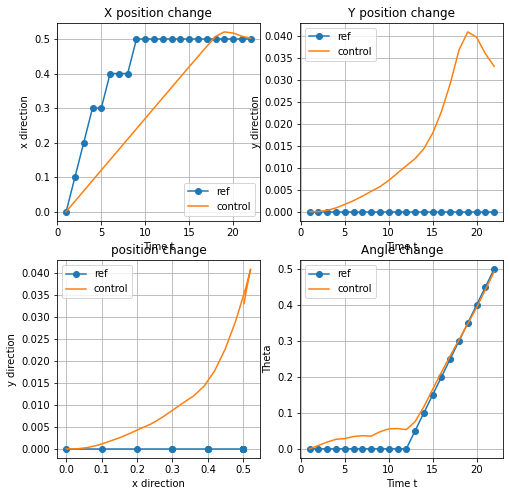

Point 16 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.55]
0.03350721509950129 [0.5  0.   0.55] [0.50118597 0.0325749  0.54224096] [-0.01040595  0.50000199]


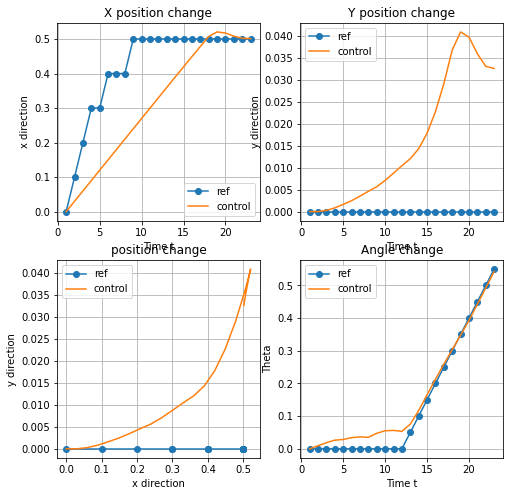

Point 17 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0.6]
0.03483244011502754 [0.5 0.  0.6] [0.50322567 0.03380378 0.59224124] [0.02381286 0.50000282]


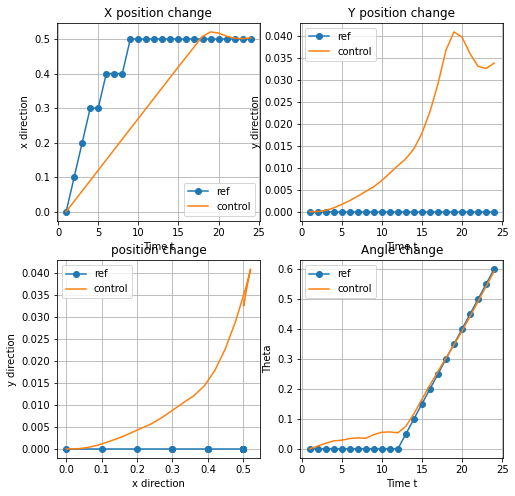

Point 18 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.65]
0.039527233423830944 [0.5  0.   0.65] [0.50901104 0.03769622 0.64224124] [0.06972922 0.5       ]


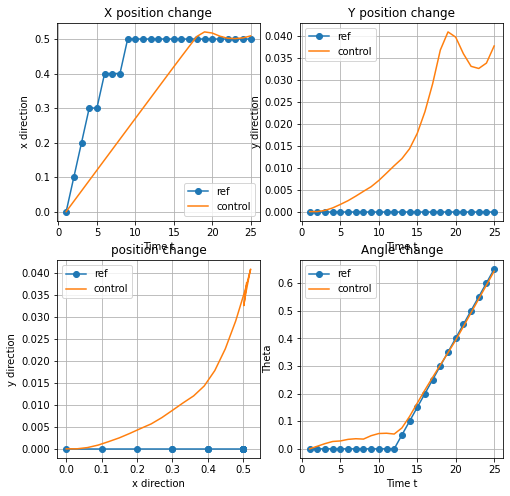

Point 19 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5 0.  0.7]
0.05552291852245453 [0.5 0.  0.7] [0.52428892 0.04912458 0.69107705] [0.19079326 0.48835805]


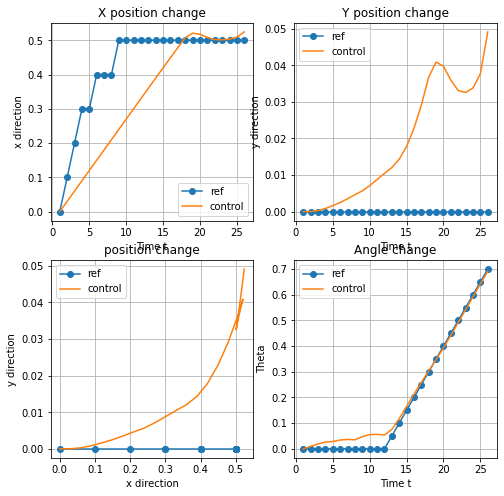

Point 20 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.75]
0.08486918741269227 [0.5  0.   0.75] [0.54740572 0.0682456  0.73273689] [0.3        0.41659837]


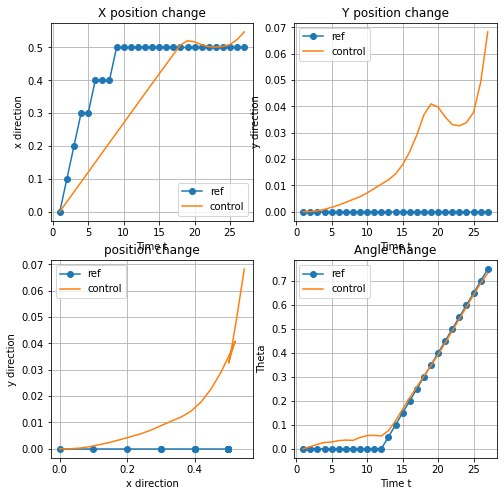

Point 21 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5        0.         0.78539816]
0.11489292386577087 [0.5        0.         0.78539816] [0.5697061  0.08831279 0.76211092] [0.29999983 0.29374035]


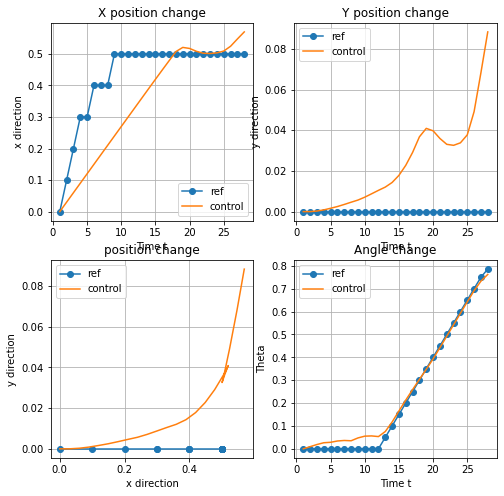

Point 22 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.55       0.05       0.78539816]
0.07220926509031597 [0.55       0.05       0.78539816] [0.59140755 0.10902634 0.78146316] [0.30000071 0.19352239]


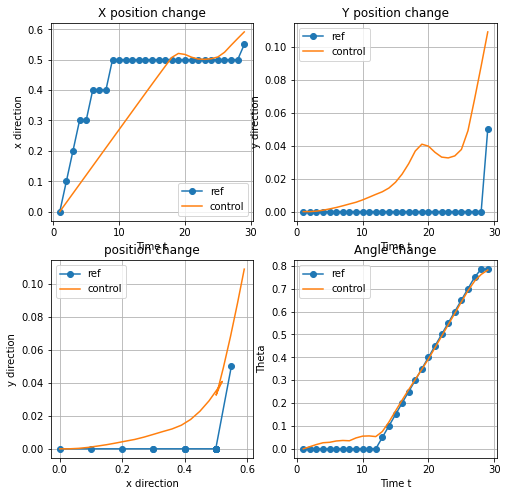

Point 23 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.6        0.1        0.78539816]
0.034136860882611544 [0.6        0.1        0.78539816] [0.61270407 0.1301559  0.79512203] [0.3        0.13658872]


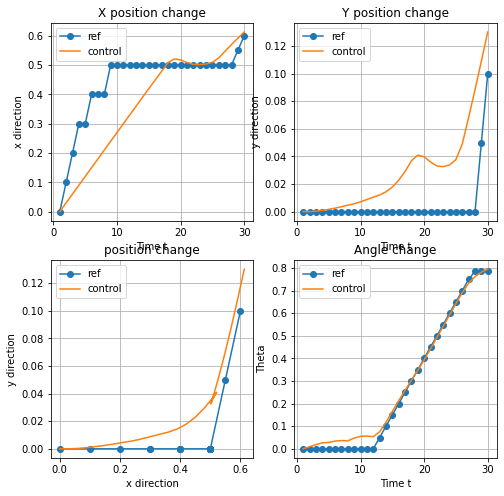

Point 24 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.65       0.15       0.78539816]
0.02569529887506334 [0.65       0.15       0.78539816] [0.63371001 0.15157439 0.8052074 ] [0.30000023 0.1008537 ]


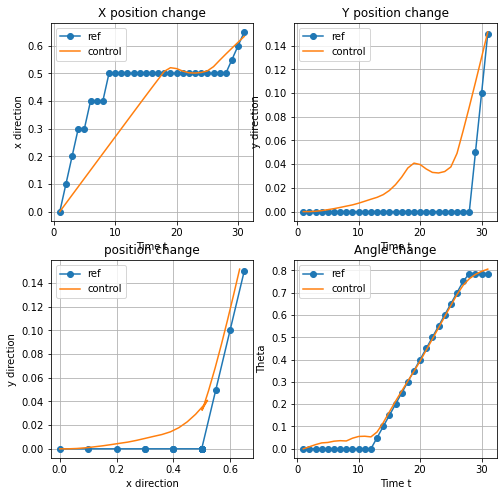

Point 25 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.7        0.2        0.78539816]
0.05926801043116626 [0.7        0.2        0.78539816] [0.65449888 0.17320364 0.81231099] [0.30000027 0.0710359 ]


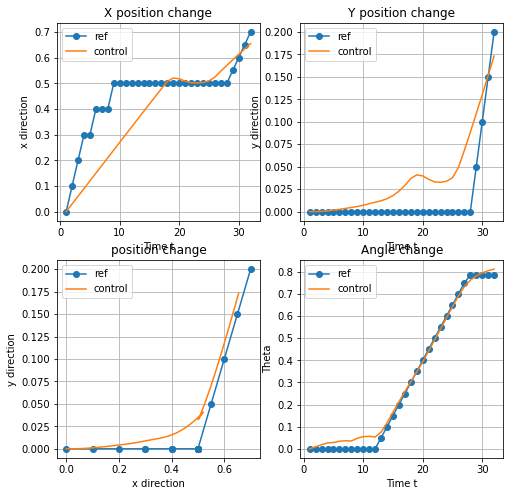

Point 26 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.7        0.2        0.78539816]
0.04007950373842891 [0.7        0.2        0.78539816] [0.67513356 0.19498    0.81642761] [0.3        0.04116619]


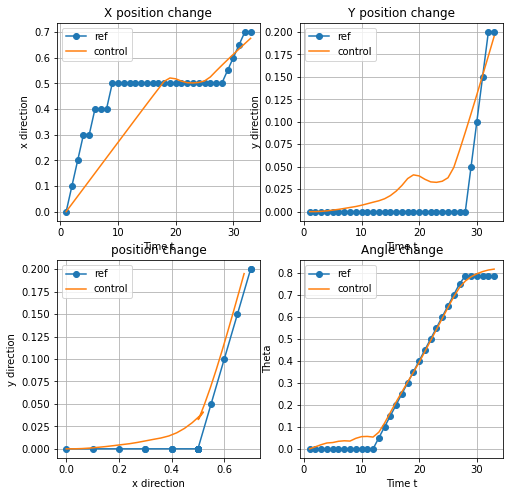

Point 27 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.75       0.25       0.78539816]
0.07360218798535861 [0.75       0.25       0.78539816] [0.69567843 0.21684112 0.82237029] [0.30000003 0.05942677]


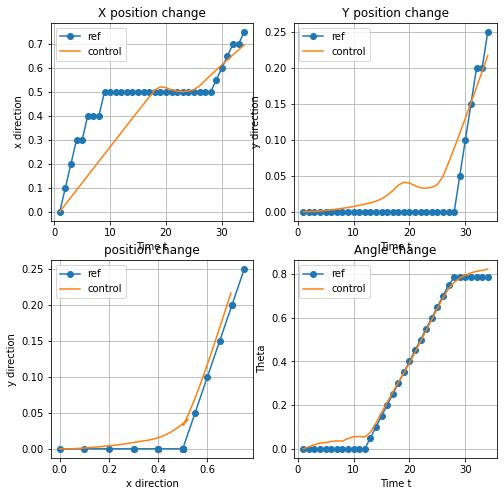

Point 28 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.8        0.3        0.78539816]
0.11301604773116392 [0.8        0.3        0.78539816] [0.71609302 0.23882395 0.83000463] [0.30000002 0.07634338]


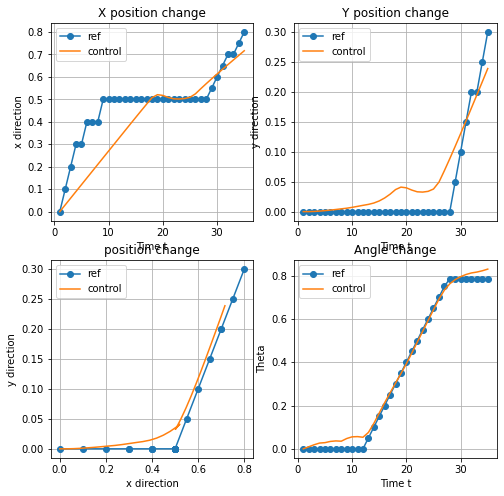

Point 29 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.8        0.3        0.78539816]
0.09031695773366333 [0.8        0.3        0.78539816] [0.73633919 0.26096199 0.83619667] [0.30000003 0.0619204 ]


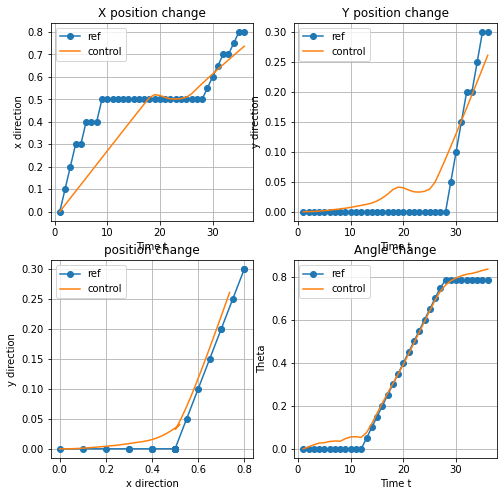

Point 30 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.85       0.35       0.78539816]
0.12684648958060946 [0.85       0.35       0.78539816] [0.7564479  0.28322497 0.83905571] [0.30000011 0.02859043]


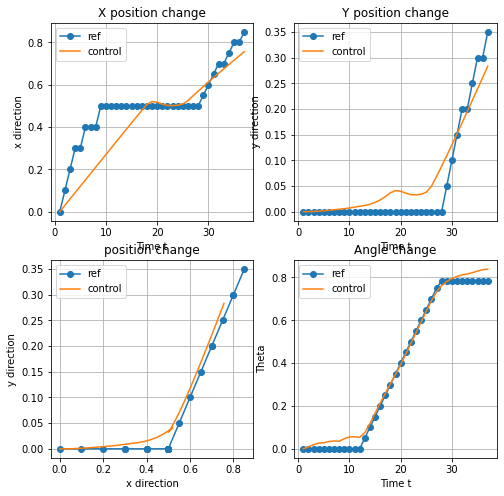

Point 31 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.78539816]
0.16034596052042888 [0.9        0.4        0.78539816] [0.77649304 0.30554553 0.82457994] [ 0.30000251 -0.14475774]


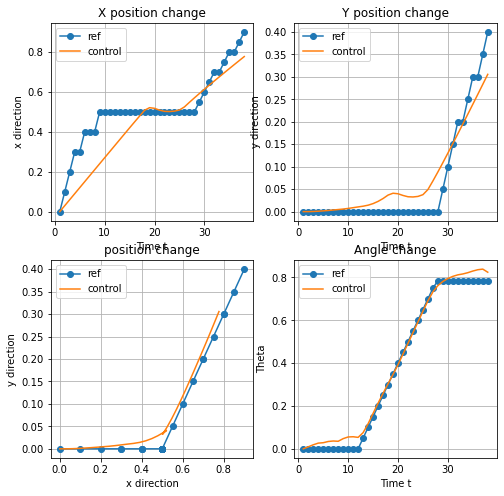

Point 32 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.73539816]
0.13316859435604897 [0.9        0.4        0.73539816] [0.796859   0.32757341 0.7784121 ] [ 0.3        -0.46167835]


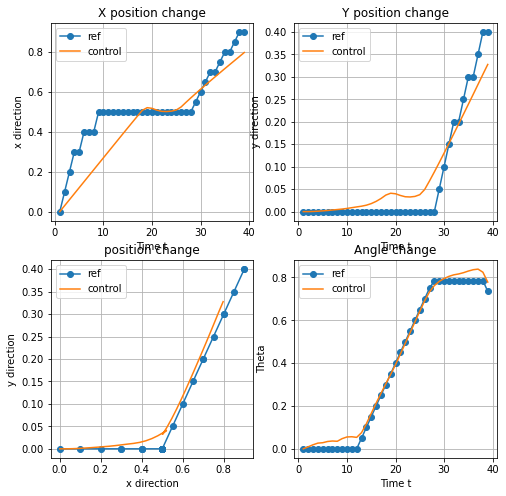

Point 33 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.68539816]
0.10571762071819225 [0.9        0.4        0.68539816] [0.81821994 0.34863796 0.72841186] [ 0.3000008  -0.50000239]


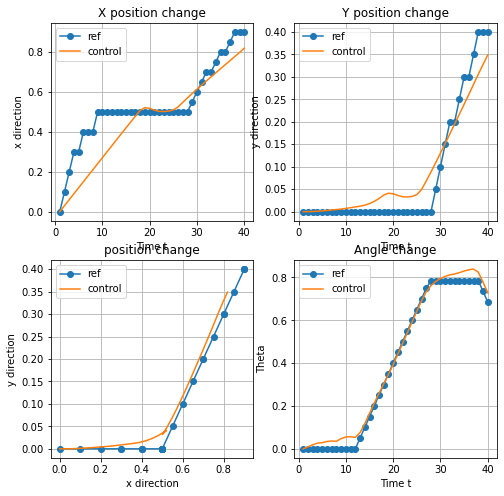

Point 34 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.63539816]
0.07976930088680716 [0.9        0.4        0.63539816] [0.84060692 0.36860852 0.67841186] [ 0.3 -0.5]


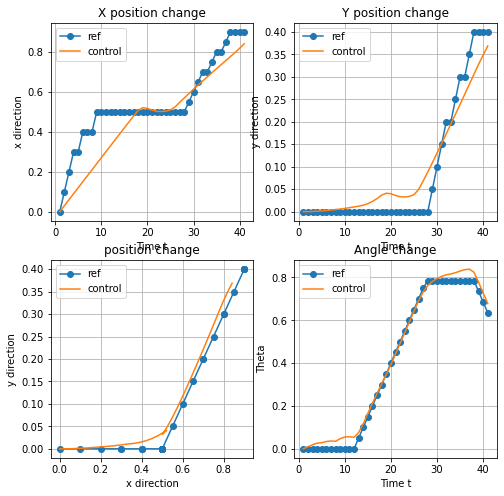

Point 35 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.58539816]
0.05750341596526803 [0.9        0.4        0.58539816] [0.86396403 0.38743524 0.62841186] [ 0.3        -0.49999997]


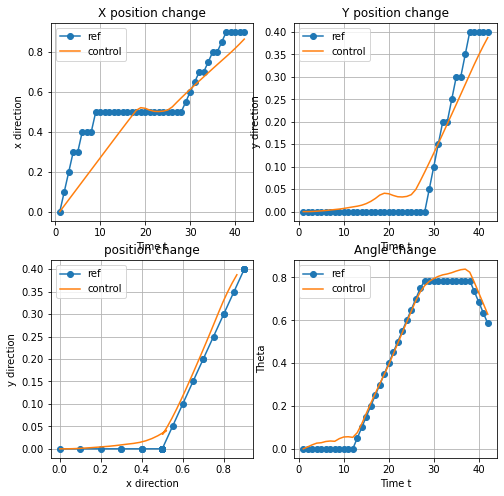

Point 36 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.53539816]
0.04488157237122484 [0.9        0.4        0.53539816] [0.88823289 0.40507106 0.57841182] [ 0.29999998 -0.5000004 ]


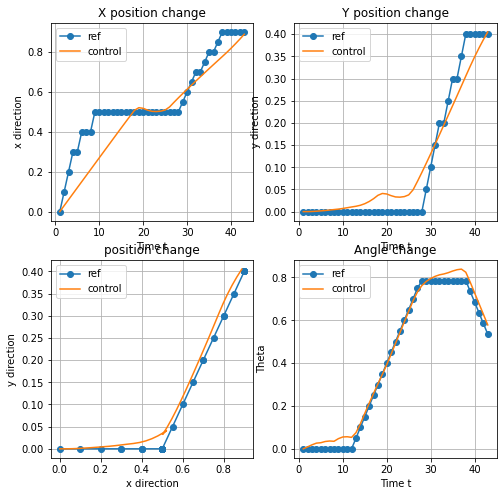

Point 37 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.48539816]
0.047374390421045354 [0.9        0.4        0.48539816] [0.90817606 0.41809197 0.52841171] [ 0.23817521 -0.50000113]


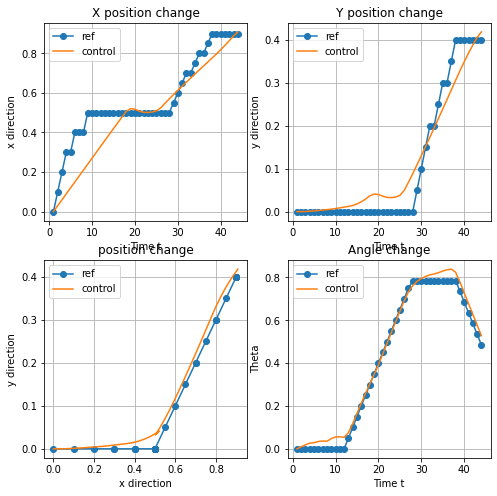

Point 38 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.43539816]
0.050395279090477196 [0.9        0.4        0.43539816] [0.9145868  0.42183447 0.47841171] [ 0.07423195 -0.5       ]


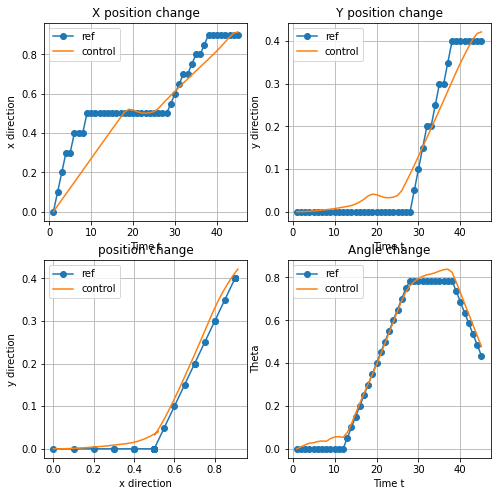

Point 39 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.38539816]
0.0483370272134818 [0.9        0.4        0.38539816] [0.91019281 0.41955578 0.42841149] [-0.04949703 -0.50000221]


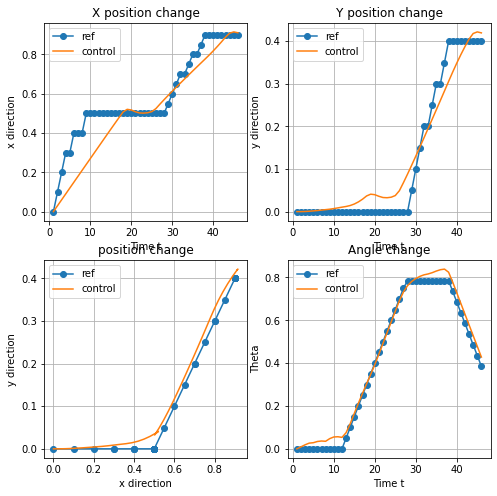

Point 40 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.33539816]
0.04603512538918117 [0.9        0.4        0.33539816] [0.902774   0.4161676  0.37841149] [-0.08155894 -0.5       ]


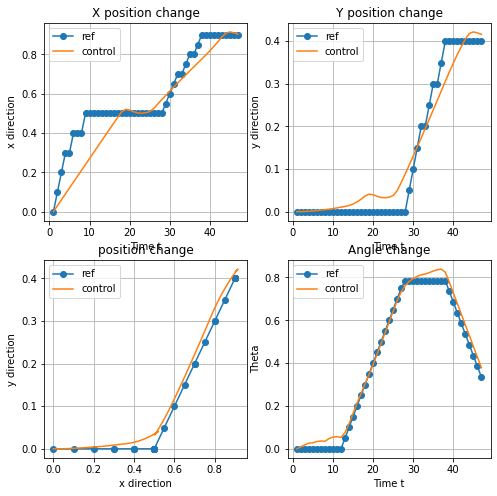

Point 41 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.28539816]
0.04539136424967173 [0.9        0.4        0.28539816] [0.89833901 0.41440438 0.32841131] [-0.04772633 -0.50000179]


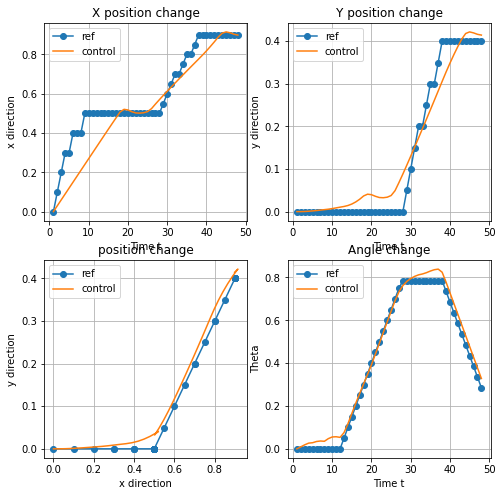

Point 42 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.23539816]
0.0453767461525333 [0.9        0.4        0.23539816] [0.89812699 0.41433213 0.27841131] [-0.00223998 -0.5       ]


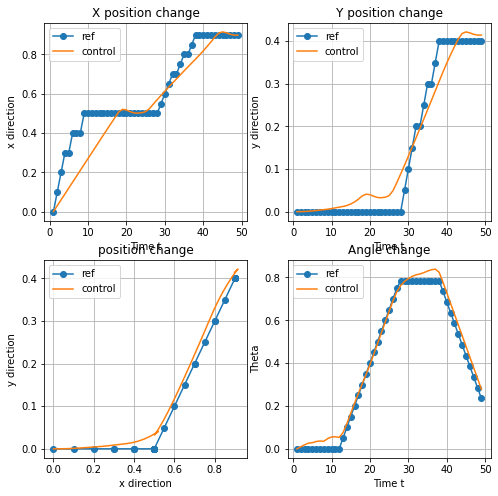

Point 43 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.18539816]
0.045509851270365456 [0.9        0.4        0.18539816] [0.8999988  0.41486716 0.22841112] [ 0.01946778 -0.50000196]


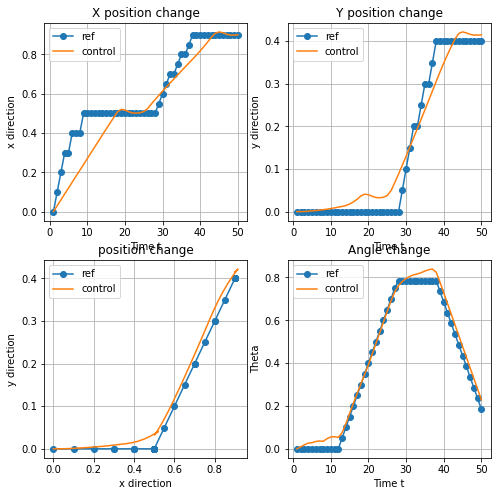

Point 44 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.13539816]
0.0489045870543803 [0.9        0.4        0.13539816] [0.91446426 0.41822992 0.17841112] [ 0.14851179 -0.5       ]


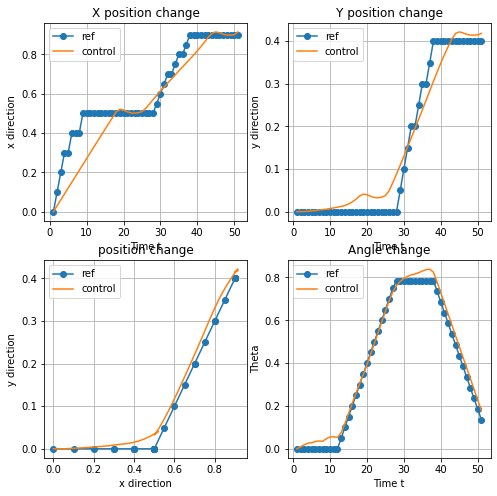

Point 45 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.08539816]
0.06587742824026033 [0.9        0.4        0.08539816] [0.94398805 0.4235539  0.12841097] [ 0.29999985 -0.50000151]


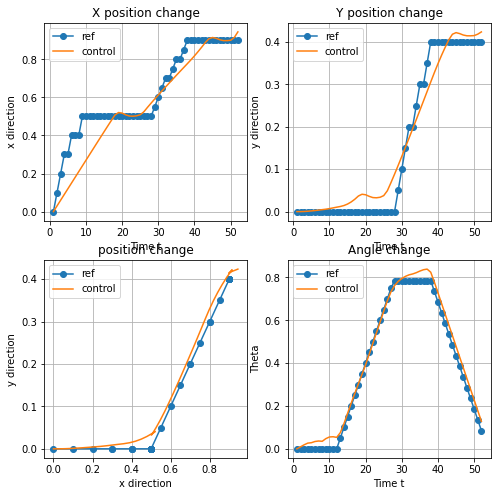

Point 46 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9        0.4        0.03539816]
0.08965695056889693 [0.9        0.4        0.03539816] [0.97374107 0.42739565 0.07841097] [ 0.30000027 -0.5       ]


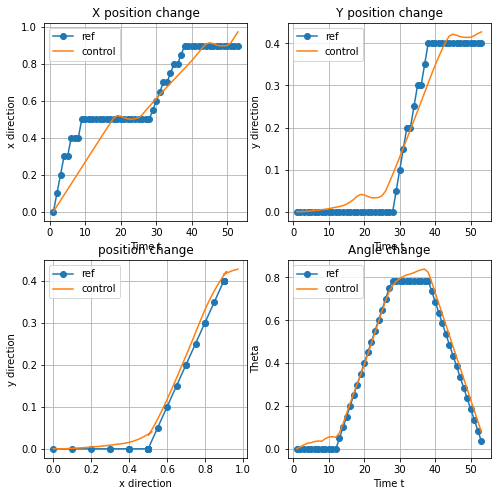

Point 47 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.9 0.4 0. ]
0.11151267075077952 [0.9 0.4 0. ] [1.0036489  0.42974557 0.02841097] [ 0.3 -0.5]


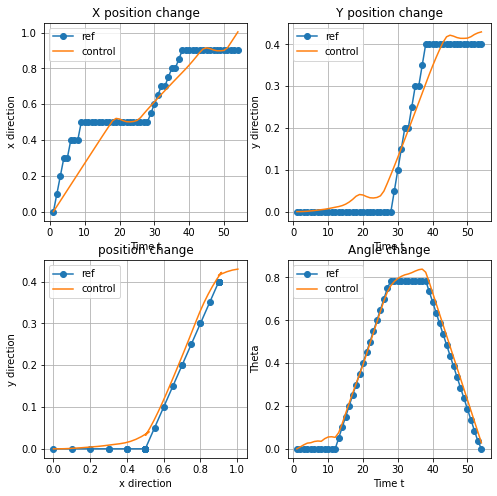

Point 48 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[1.  0.4 0. ]
0.04552334874052329 [1.  0.4 0. ] [1.03363679 0.43059778 0.00217192] [ 0.3        -0.26239044]


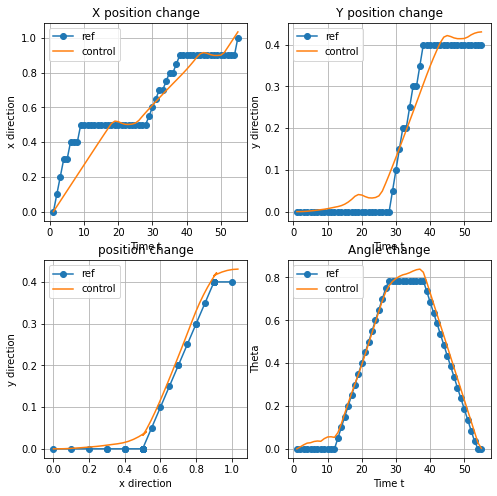

Point 49 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[1.1 0.4 0. ]
0.047608995231215846 [1.1 0.4 0. ] [ 1.06363672  0.43066294 -0.00202786] [ 0.3        -0.04199784]


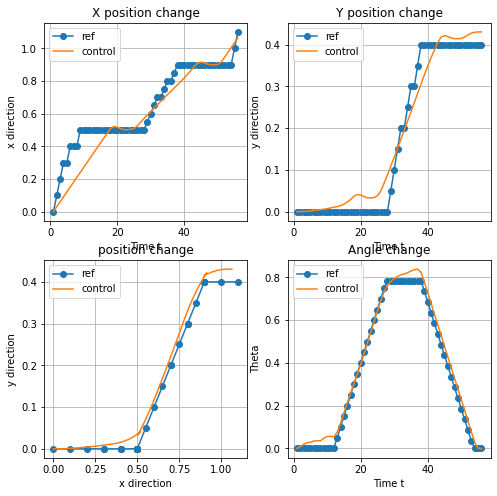

Point 50 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[1.2 0.4 0. ]
0.11068302653615718 [1.2 0.4 0. ] [ 1.09363666e+00  4.30602106e-01 -1.04059348e-03] [0.3        0.00987269]


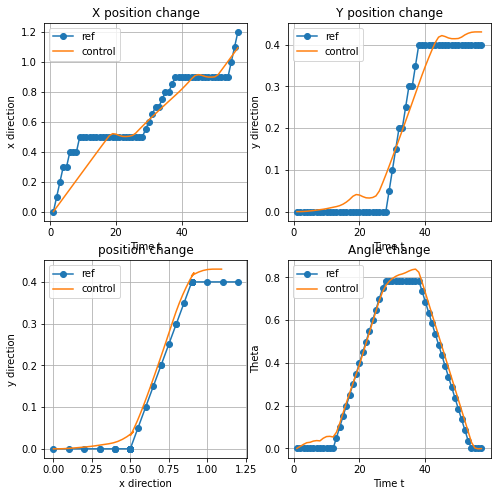

Point 51 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[1.3 0.4 0. ]
0.17955438568634938 [1.3 0.4 0. ] [ 1.12363664  0.43057089 -0.01418323] [ 0.3        -0.13142632]


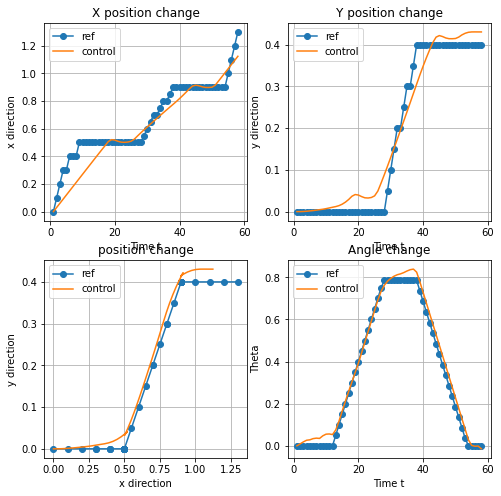

Point 52 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3   0.4  -0.05]
0.14947032193740392 [ 1.3   0.4  -0.05] [ 1.15363362  0.43014541 -0.05308473] [ 0.3        -0.38901505]


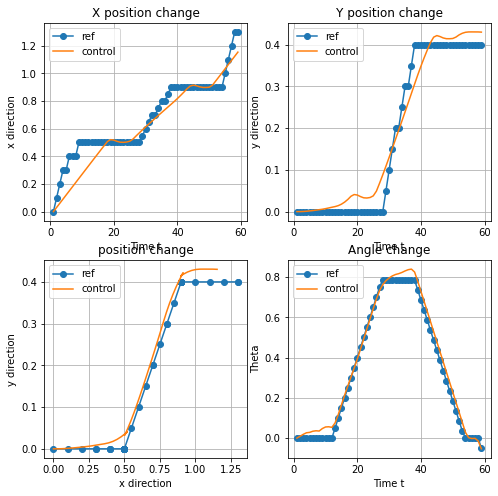

Point 53 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3  0.4 -0.1]
0.11989910284850436 [ 1.3  0.4 -0.1] [ 1.18359136  0.42855361 -0.10308473] [ 0.3        -0.50000004]


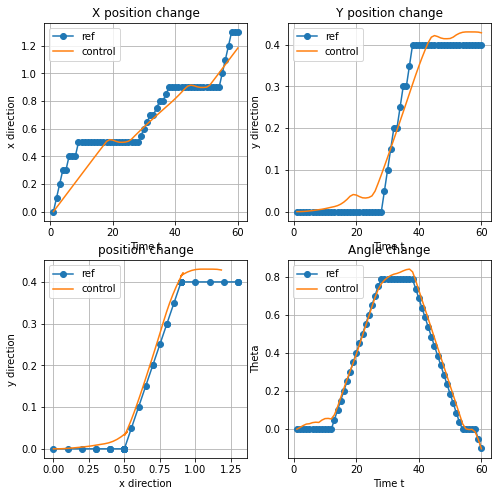

Point 54 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3   0.4  -0.15]
0.0902887527013817 [ 1.3   0.4  -0.15] [ 1.21343212  0.42546654 -0.15308472] [ 0.30000008 -0.49999985]


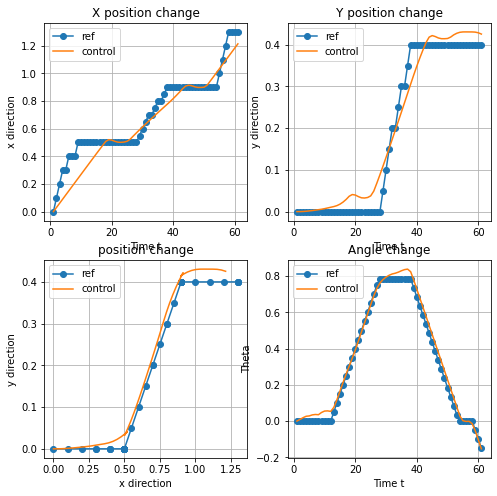

Point 55 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3  0.4 -0.2]
0.06071019743066933 [ 1.3  0.4 -0.2] [ 1.24308128  0.42089192 -0.20308475] [ 0.30000006 -0.50000027]


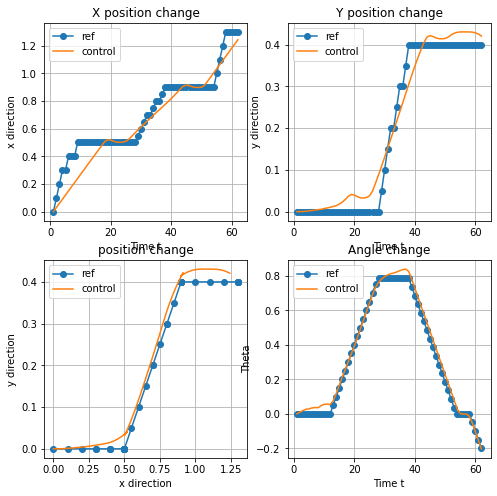

Point 56 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3   0.4  -0.25]
0.03143191865918837 [ 1.3   0.4  -0.25] [ 1.27246476  0.41484117 -0.25308474] [ 0.3        -0.49999992]


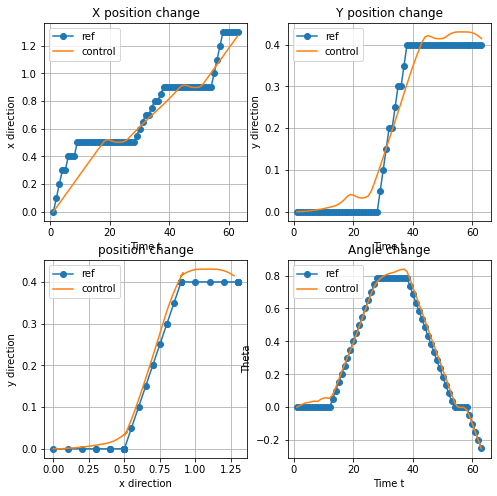

Point 57 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3  0.4 -0.3]
0.00809405046978604 [ 1.3  0.4 -0.3] [ 1.3015091   0.40732942 -0.30308478] [ 0.3        -0.50000046]


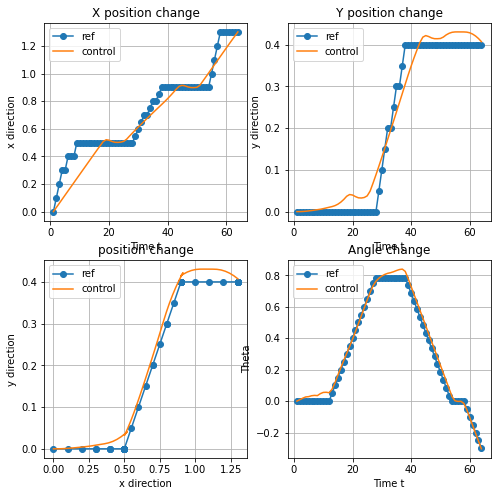

Point 58 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3   0.4  -0.35]
0.015317552699976771 [ 1.3   0.4  -0.35] [ 1.31465442  0.40321862 -0.35308478] [ 0.13773097 -0.5       ]


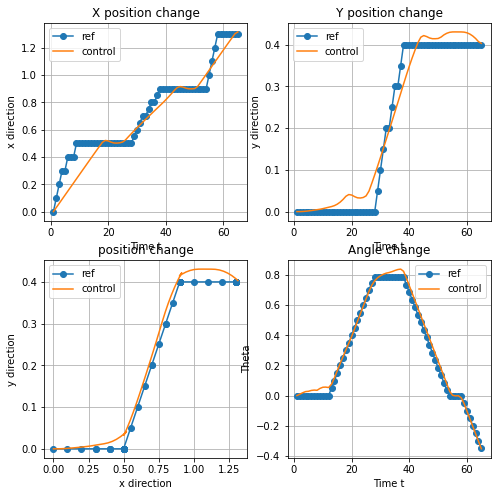

Point 59 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3  0.4 -0.4]
0.012004197990707073 [ 1.3  0.4 -0.4] [ 1.31060082  0.40471249 -0.40308478] [-0.04320107 -0.50000001]


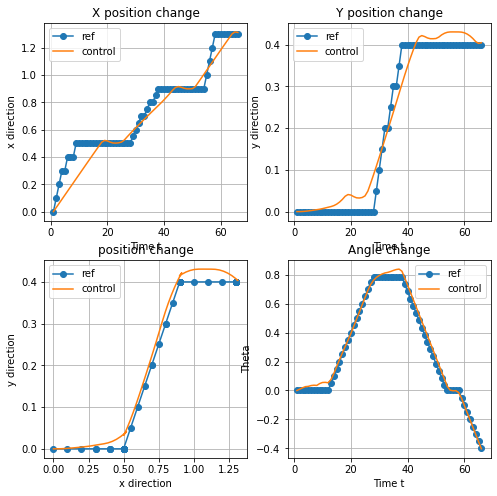

Point 60 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3   0.4  -0.45]
0.009301487140146824 [ 1.3   0.4  -0.45] [ 1.30130219  0.40867774 -0.45308525] [-0.10108792 -0.50000469]


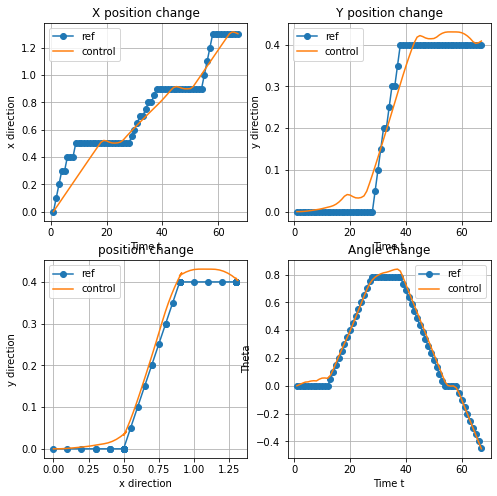

Point 61 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3  0.4 -0.5]
0.01222067834434132 [ 1.3  0.4 -0.5] [ 1.29615681  0.41118285 -0.50308525] [-0.05722803 -0.5       ]


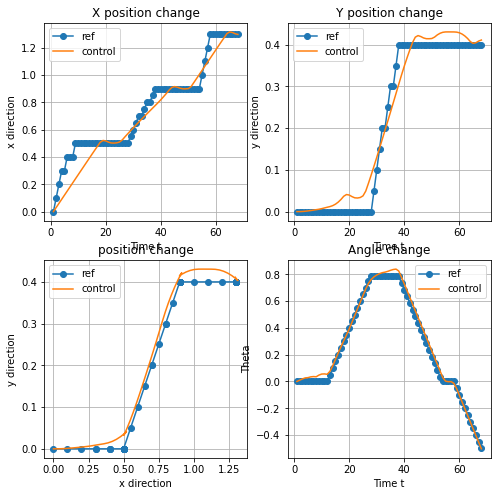

Point 62 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3   0.4  -0.55]
0.011886038765038624 [ 1.3   0.4  -0.55] [ 1.29657158  0.4109546  -0.55308556] [ 0.00473425 -0.50000308]


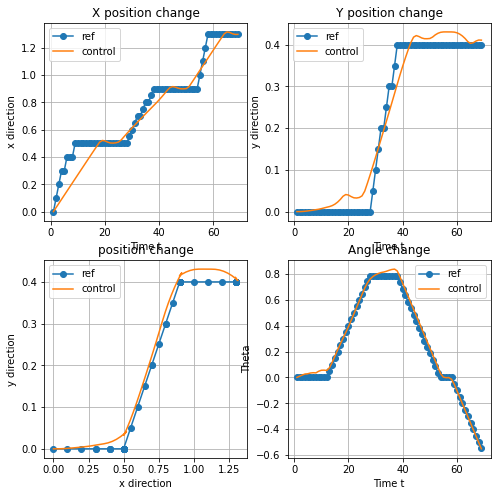

Point 63 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3  0.4 -0.6]
0.009799825629201606 [ 1.3  0.4 -0.6] [ 1.29929304  0.40927448 -0.60308557] [ 0.03198296 -0.50000012]


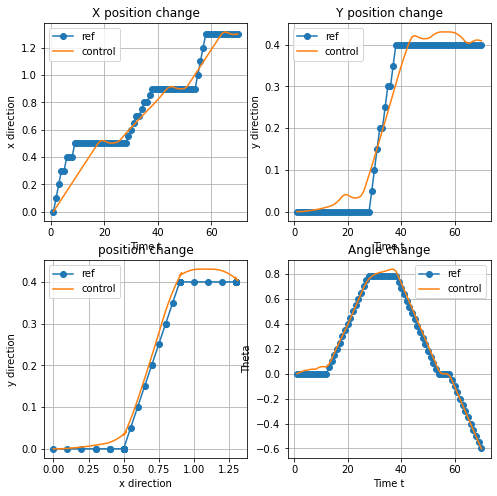

Point 64 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3   0.4  -0.65]
0.008424874894673648 [ 1.3   0.4  -0.65] [ 1.30658623  0.40425183 -0.65308577] [ 0.08855378 -0.50000198]


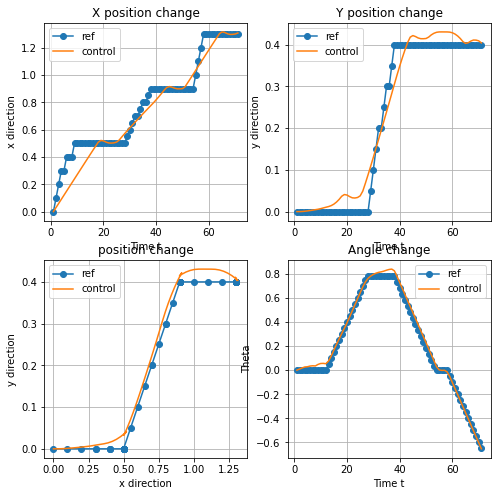

Point 65 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3  0.4 -0.7]
0.027676947021135975 [ 1.3  0.4 -0.7] [ 1.32552726  0.38976034 -0.70308577] [ 0.23848809 -0.5       ]


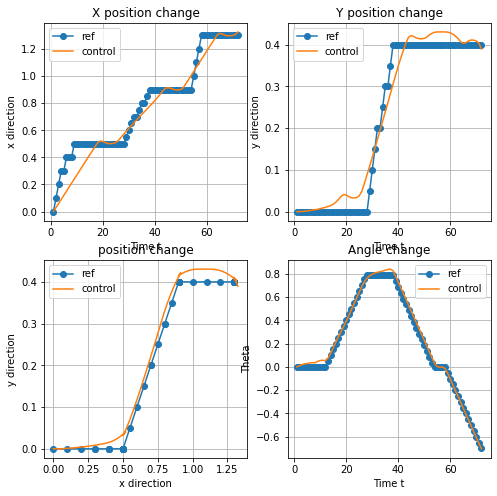

Point 66 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3   0.4  -0.75]
0.05680369234886767 [ 1.3   0.4  -0.75] [ 1.34841277  0.3703631  -0.74787474] [ 0.3        -0.44788966]


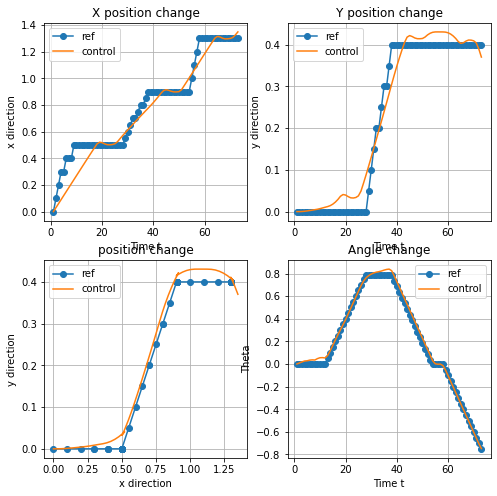

Point 67 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.3         0.4        -0.78539816]
0.086716618082972 [ 1.3         0.4        -0.78539816] [ 1.37040695  0.34996054 -0.77773745] [ 0.30000131 -0.29862716]


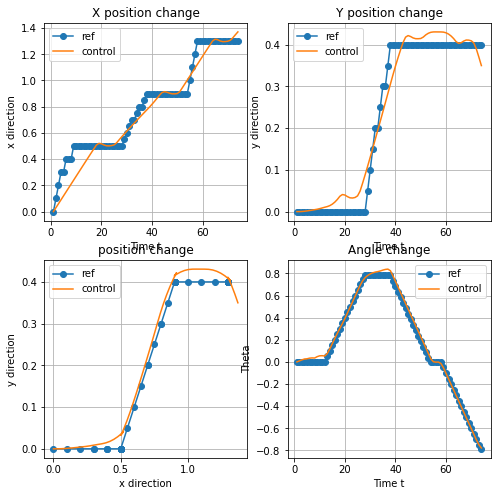

Point 68 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.35        0.35       -0.78539816]
0.047295923883696446 [ 1.35        0.35       -0.78539816] [ 1.39178203  0.32891047 -0.79220975] [ 0.3        -0.14472295]


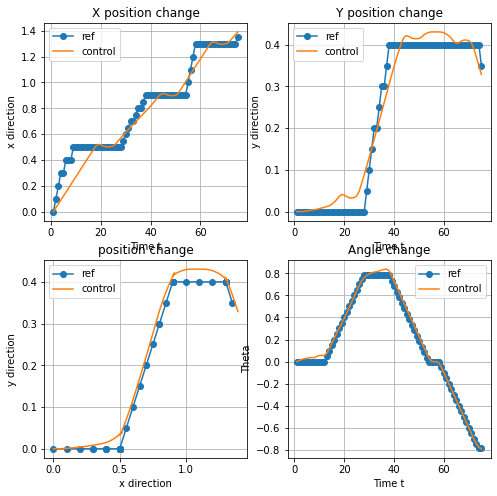

Point 69 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.4         0.3        -0.78539816]
0.019354499579386238 [ 1.4         0.3        -0.78539816] [ 1.41285041  0.3075531  -0.79774378] [ 0.30000228 -0.05534031]


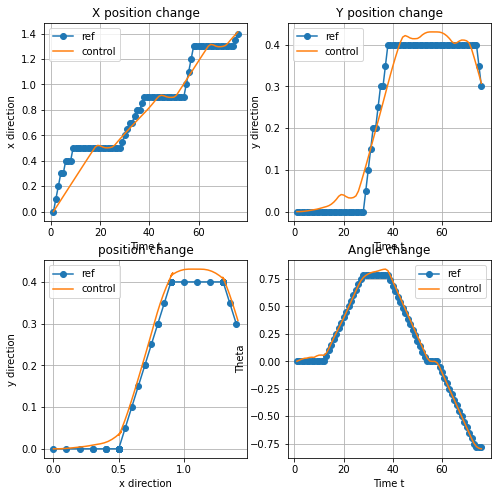

Point 70 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.4         0.3        -0.78539816]
0.03876204615955603 [ 1.4         0.3        -0.78539816] [ 1.43380011  0.28607963 -0.79829281] [ 0.3        -0.00549026]


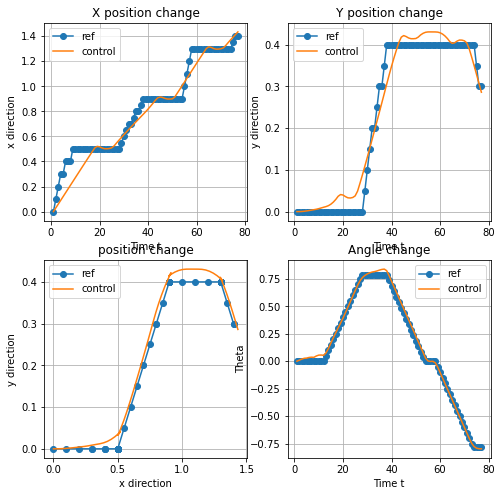

Point 71 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.45        0.25       -0.78539816]
0.02126022906629738 [ 1.45        0.25       -0.78539816] [ 1.45473807  0.26459461 -0.80011364] [ 0.3000007  -0.01820836]


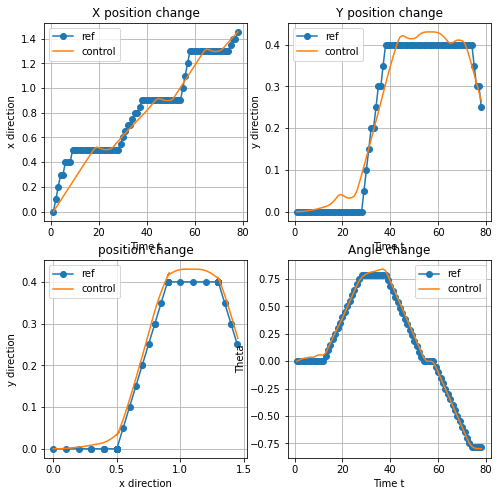

Point 72 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.5         0.2        -0.78539816]
0.05261659230615558 [ 1.5         0.2        -0.78539816] [ 1.47563683  0.24307155 -0.80328064] [ 0.3        -0.03166998]


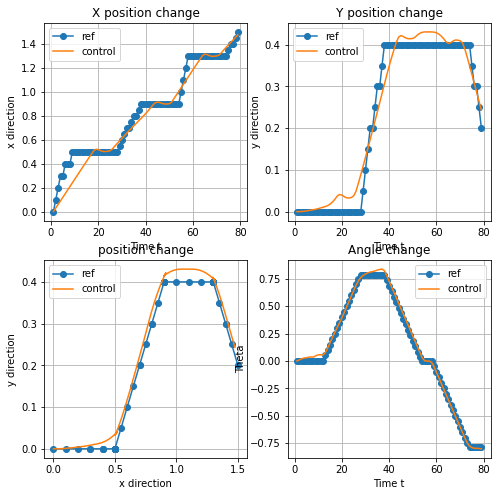

Point 73 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.5         0.2        -0.78539816]
0.029379559414553388 [ 1.5         0.2        -0.78539816] [ 1.49646732  0.22148242 -0.80512592] [ 0.30000002 -0.01845283]


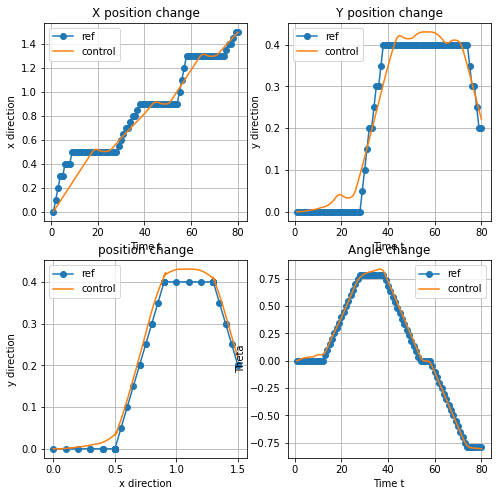

Point 74 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.55        0.15       -0.78539816]
0.06394643230225051 [ 1.55        0.15       -0.78539816] [ 1.51725793  0.19985488 -0.80845449] [ 0.3        -0.03328569]


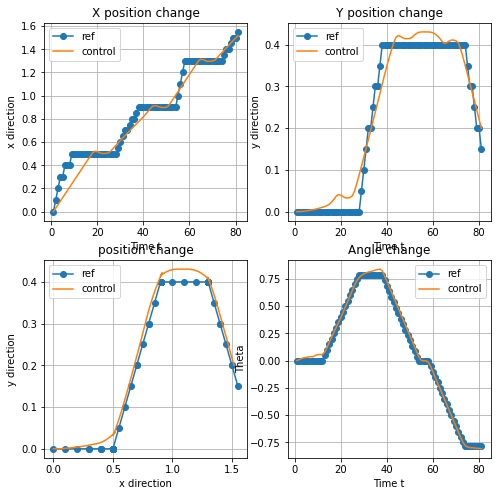

Point 75 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.6         0.1        -0.78539816]
0.10336243490536745 [ 1.6         0.1        -0.78539816] [ 1.53797644  0.17815826 -0.81238256] [ 0.3        -0.03928073]


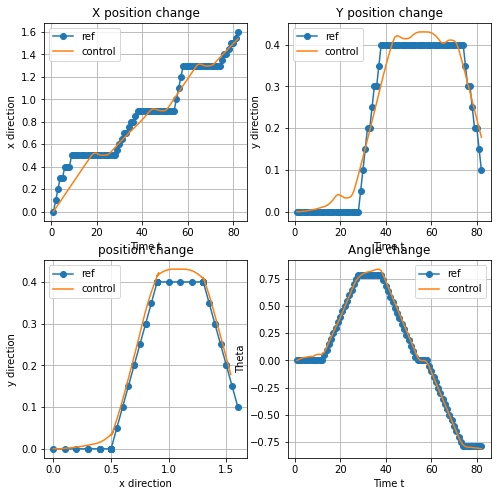

Point 76 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.6         0.1        -0.78539816]
0.07572293124218726 [ 1.6         0.1        -0.78539816] [ 1.55860957  0.15638042 -0.81441613] [ 0.3        -0.02033566]


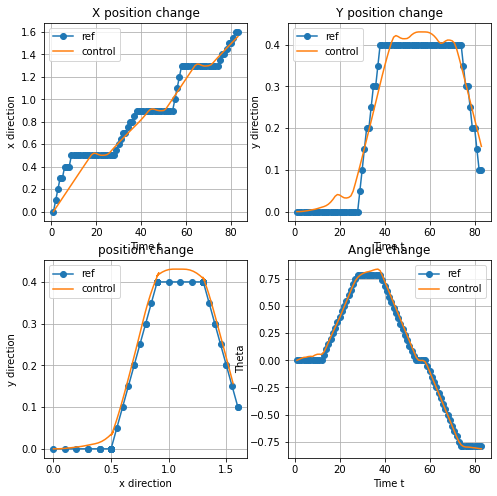

Point 77 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.65        0.05       -0.78539816]
0.11489989012810568 [ 1.65        0.05       -0.78539816] [ 1.57919836  0.13456067 -0.81762557] [ 0.3        -0.03209439]


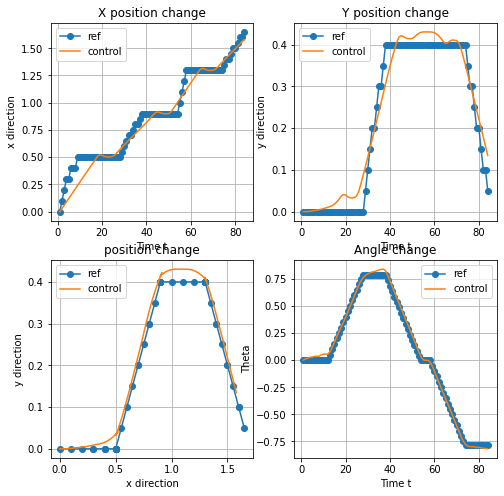

Point 78 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.70000000e+00  5.55111512e-17 -7.85398163e-01]
0.15507929410550028 [ 1.70000000e+00  5.55111512e-17 -7.85398163e-01] [ 1.59971702  0.11267495 -0.82141575] [ 0.3        -0.03790178]


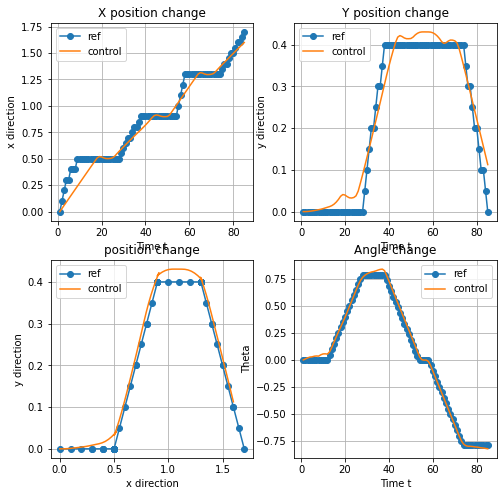

Point 79 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.70000000e+00  2.77555756e-17 -7.85398163e-01]
0.12669993864100623 [ 1.70000000e+00  2.77555756e-17 -7.85398163e-01] [ 1.62015258  0.09071163 -0.8234595 ] [ 0.3        -0.02043755]


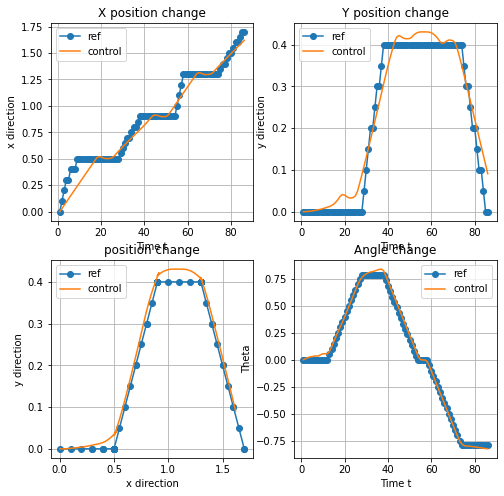

Point 80 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.75       -0.05       -0.78539816]
0.1667006936181911 [ 1.75       -0.05       -0.78539816] [ 1.64054322  0.06870658 -0.82683586] [ 0.30000003 -0.0337636 ]


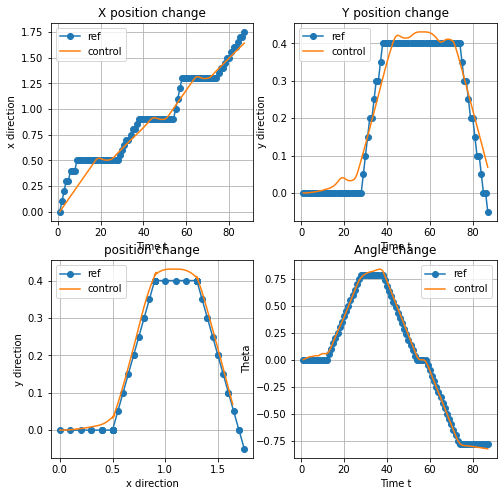

Point 81 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.8        -0.1        -0.78539816]
0.20717413020978157 [ 1.8        -0.1        -0.78539816] [ 1.66085944  0.0466328  -0.83078368] [ 0.30000005 -0.03947823]
Point 81 ,Step 2 - MSE error in lifted space, ref, state x, input u:
[ 1.8        -0.1        -0.78539816]
0.1777494389295551 [ 1.8        -0.1        -0.78539816] [ 1.68108836  0.024479   -0.8296685 ] [0.30000001 0.0111519 ]


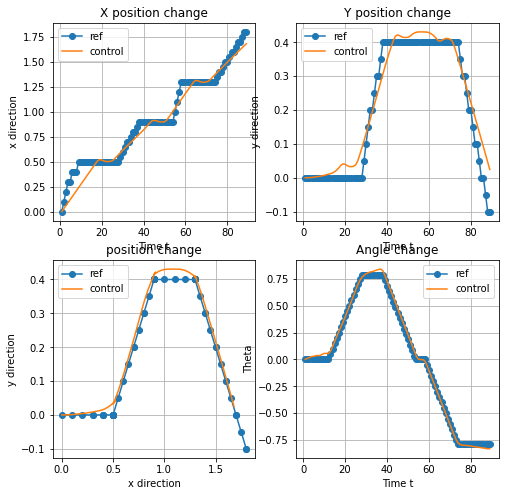

Point 82 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.8        -0.1        -0.78539816]
0.1484511652753397 [ 1.8        -0.1        -0.78539816] [ 1.70134197  0.00234777 -0.82816818] [0.3        0.01500314]


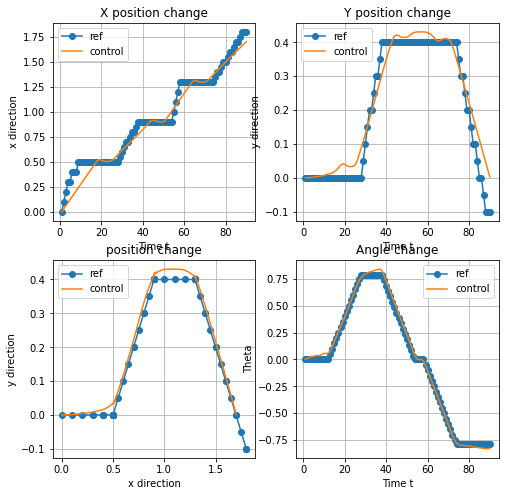

Point 83 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.85       -0.15       -0.78539816]
0.1881992931405113 [ 1.85       -0.15       -0.78539816] [ 1.72162876 -0.01975304 -0.82984509] [ 0.30000001 -0.01676907]


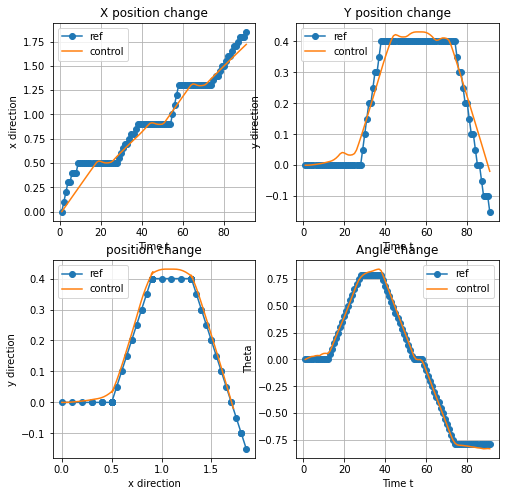

Point 84 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.9        -0.2        -0.78539816]
0.22840548264523391 [ 1.9        -0.2        -0.78539816] [ 1.74187847 -0.04188785 -0.83195128] [ 0.30000004 -0.02106196]
Point 84 ,Step 2 - MSE error in lifted space, ref, state x, input u:
[ 1.9        -0.2        -0.78539816]
0.1987087398502198 [ 1.9        -0.2        -0.78539816] [ 1.7620815  -0.06406526 -0.82995595] [0.3       0.0199533]


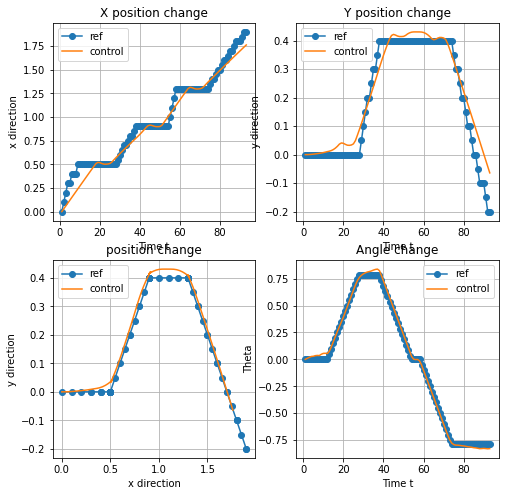

Point 85 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.9        -0.2        -0.78539816]
0.16868910489329206 [ 1.9        -0.2        -0.78539816] [ 1.78232875 -0.08620231 -0.82613606] [0.3        0.03819897]


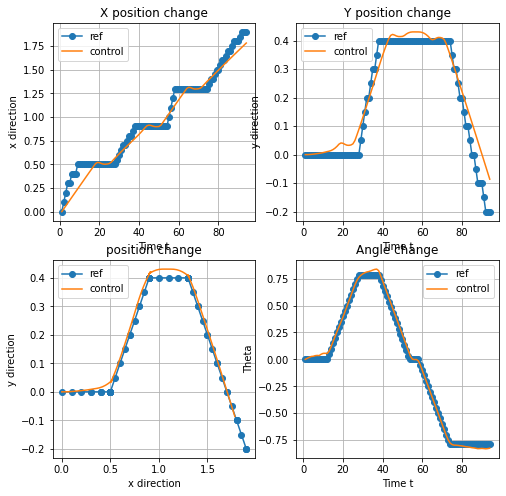

Point 86 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.9        -0.2        -0.78539816]
0.13913748683770322 [ 1.9        -0.2        -0.78539816] [ 1.80266041 -0.10826185 -0.82371732] [0.30000003 0.02418739]


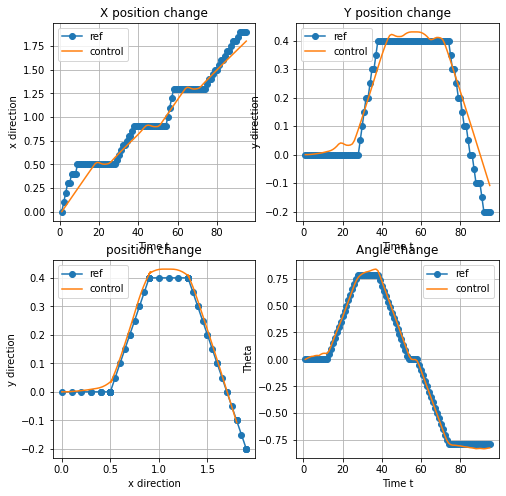

Point 87 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.95       -0.25       -0.78539816]
0.17908521382048495 [ 1.95       -0.25       -0.78539816] [ 1.82304538 -0.13027216 -0.82563849] [ 0.30000011 -0.01921168]


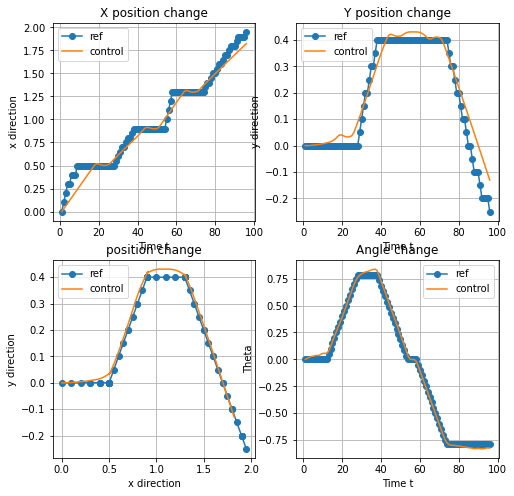

Point 88 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.         -0.3        -0.78539816]
0.21976027076265292 [ 2.         -0.3        -0.78539816] [ 1.84338802 -0.1523216  -0.82965149] [ 0.30000015 -0.04012999]
Point 88 ,Step 2 - MSE error in lifted space, ref, state x, input u:
[ 2.         -0.3        -0.78539816]
0.19041106623073462 [ 2.         -0.3        -0.78539816] [ 1.86364201 -0.17445249 -0.82899514] [0.30000004 0.00656346]


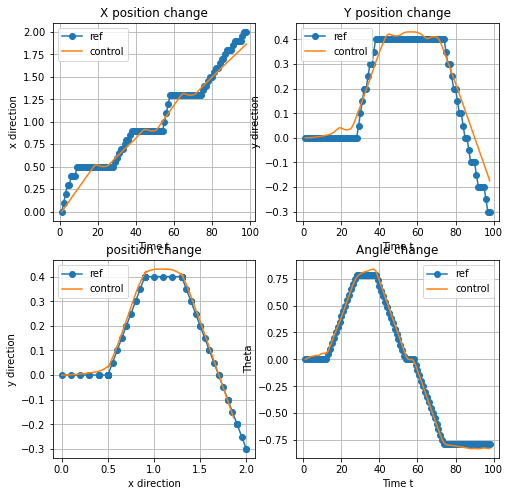

Point 89 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.         -0.3        -0.78539816]
0.16118290480005318 [ 2.         -0.3        -0.78539816] [ 1.88391052 -0.19657008 -0.82788832] [0.30000003 0.01106819]


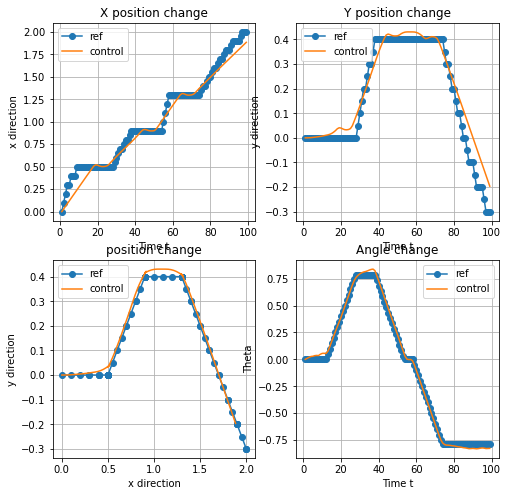

Point 90 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.05       -0.35       -0.78539816]
0.20118225544996723 [ 2.05       -0.35       -0.78539816] [ 1.9042035  -0.21866522 -0.82976997] [ 0.30000006 -0.01881647]
Point 90 ,Step 2 - MSE error in lifted space, ref, state x, input u:
[ 2.05       -0.35       -0.78539816]
0.17182278756929162 [ 2.05       -0.35       -0.78539816] [ 1.92445487 -0.2407985  -0.82825284] [0.30000001 0.01517126]


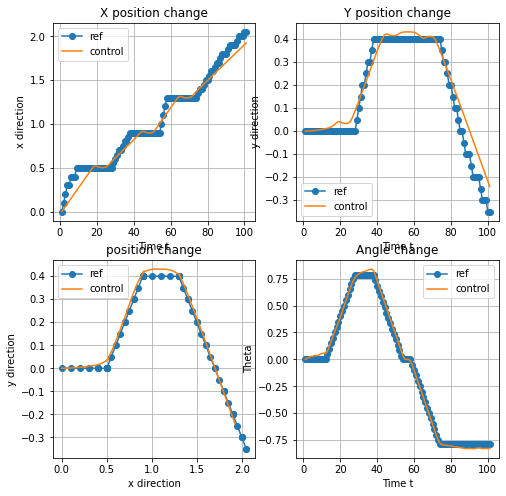

Point 91 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.1        -0.4        -0.78539816]
0.21126327222378677 [ 2.1        -0.4        -0.78539816] [ 1.94473979 -0.26290104 -0.82699519] [0.30000003 0.01257651]
Point 91 ,Step 2 - MSE error in lifted space, ref, state x, input u:
[ 2.1        -0.4        -0.78539816]
0.18130869074797745 [ 2.1        -0.4        -0.78539816] [ 1.96505249 -0.28497804 -0.82323943] [0.3        0.03755762]


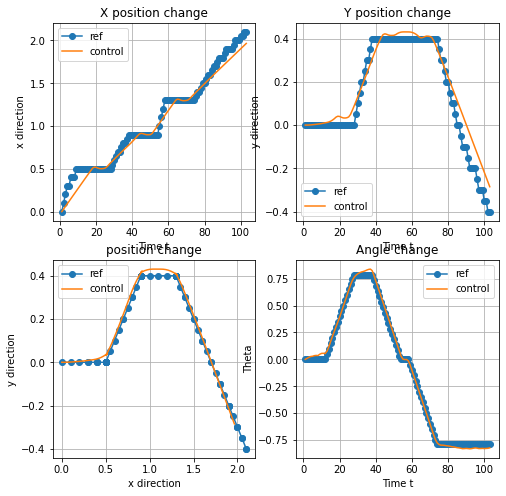

Point 92 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.1        -0.4        -0.78539816]
0.15125334308818955 [ 2.1        -0.4        -0.78539816] [ 1.98544797 -0.3069786  -0.81860096] [0.3        0.04638472]


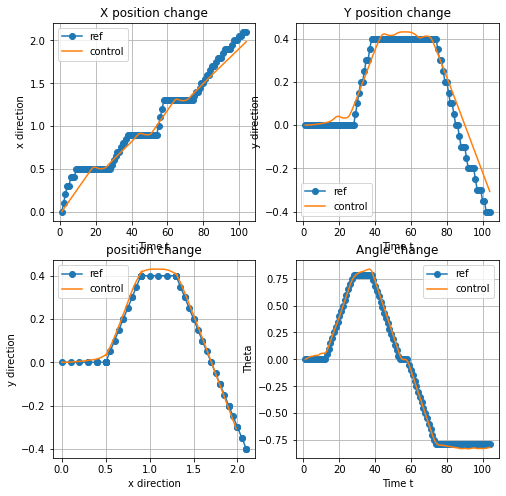

Point 93 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.1        -0.4        -0.78539816]
0.12218227133298366 [ 2.1        -0.4        -0.78539816] [ 2.00594527 -0.32888432 -0.81741028] [0.3        0.01190672]


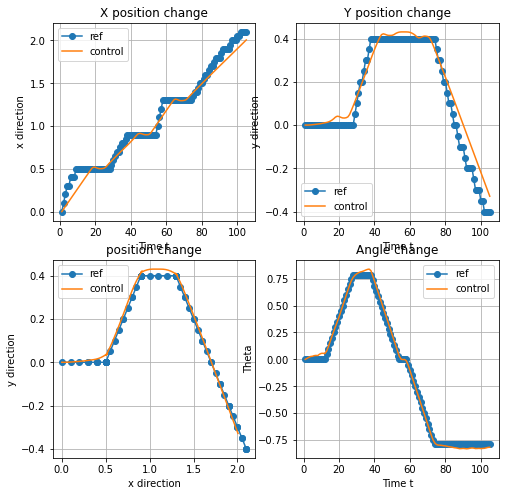

Point 94 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.15       -0.45       -0.78539816]
0.16230968180109273 [ 2.15       -0.45       -0.78539816] [ 2.02646864 -0.35076562 -0.82056881] [ 0.3        -0.03158529]


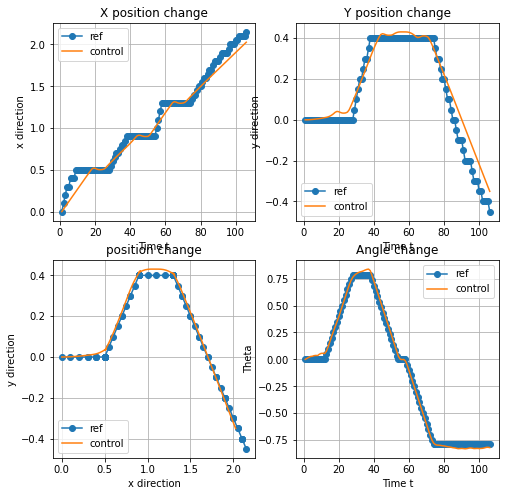

Point 95 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.78539816]
0.20193308108391092 [ 2.2        -0.5        -0.78539816] [ 2.0469228  -0.37271163 -0.81919183] [0.3        0.01376986]
Point 95 ,Step 2 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.78539816]
0.17173254673911068 [ 2.2        -0.5        -0.78539816] [ 2.06740715 -0.39462946 -0.81382798] [0.3        0.05363843]


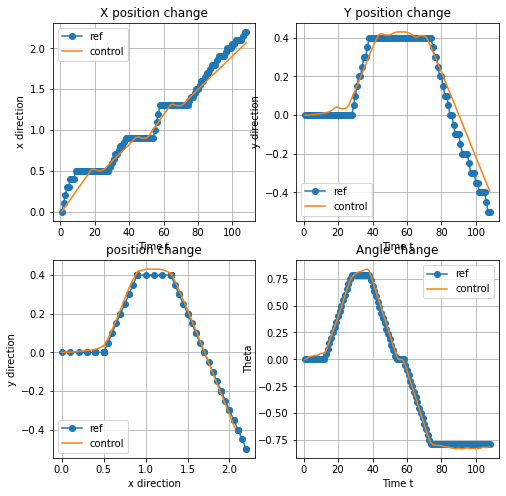

Point 96 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.78539816]
0.139847905297526 [ 2.2        -0.5        -0.78539816] [ 2.08800878 -0.4164371  -0.79111176] [0.30000001 0.22716223]


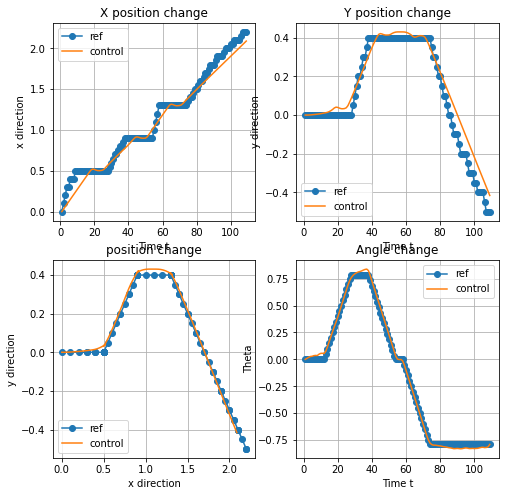

Point 97 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.73539816]
0.11043849604028466 [ 2.2        -0.5        -0.73539816] [ 2.10910053 -0.43777125 -0.74324228] [0.3000013  0.47869483]


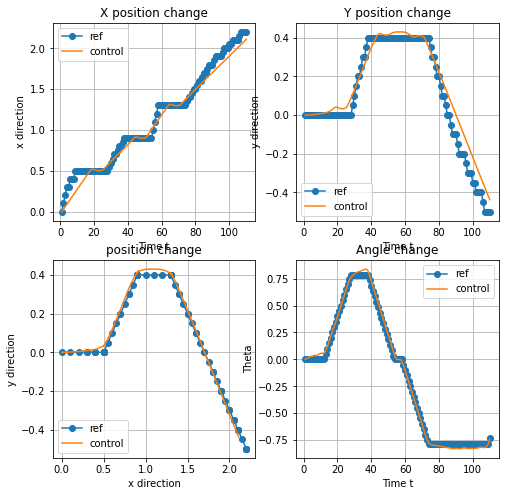

Point 98 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.68539816]
0.0809598047557636 [ 2.2        -0.5        -0.68539816] [ 2.13118888 -0.45807161 -0.69324228] [0.3 0.5]


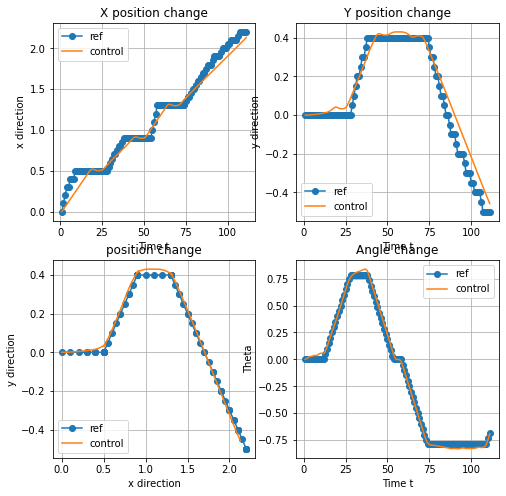

Point 99 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.63539816]
0.05168352115701185 [ 2.2        -0.5        -0.63539816] [ 2.15426422 -0.47724264 -0.64324211] [0.29999994 0.50000173]


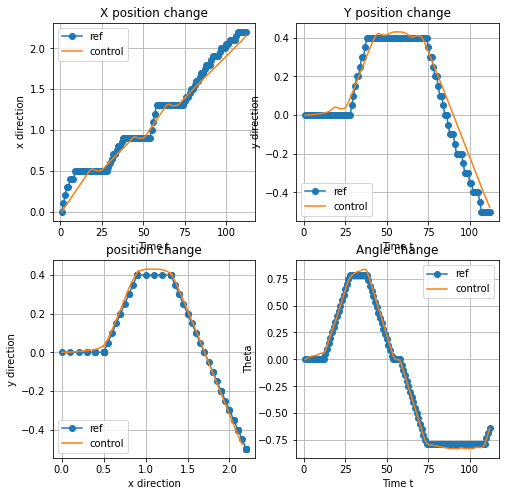

Point 100 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.58539816]
0.023589417856976023 [ 2.2        -0.5        -0.58539816] [ 2.17826888 -0.49523643 -0.59324211] [0.3        0.49999998]


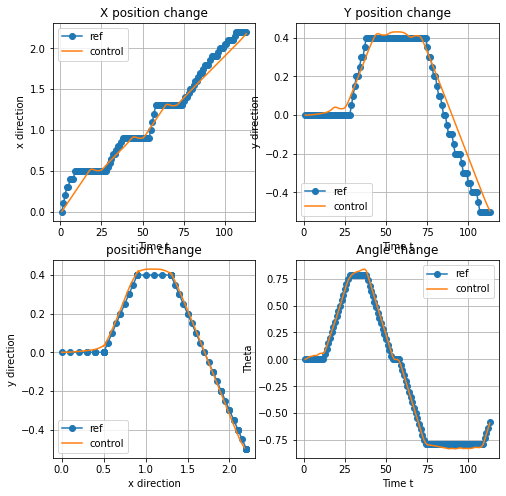

Point 101 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.53539816]
0.014683219484755719 [ 2.2        -0.5        -0.53539816] [ 2.20314286 -0.51200799 -0.54324212] [0.3        0.49999991]


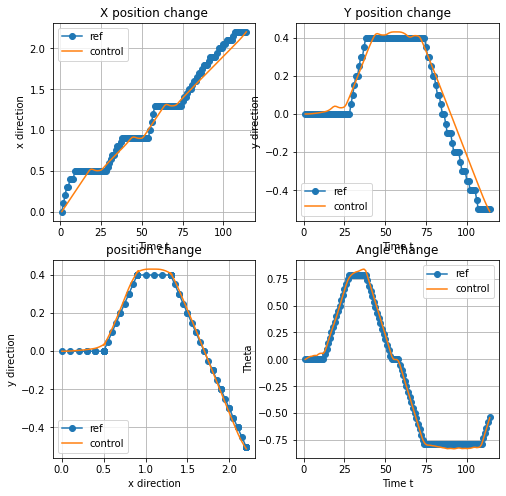

Point 102 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.48539816]
0.026838580668201283 [ 2.2        -0.5        -0.48539816] [ 2.21621117 -0.51989923 -0.49324214] [0.15266059 0.49999977]


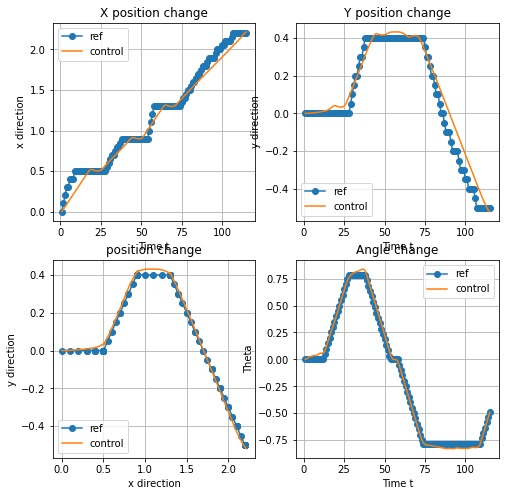

Point 103 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.43539816]
0.024573095377614755 [ 2.2        -0.5        -0.43539816] [ 2.21392133 -0.5186683  -0.44324216] [-0.02599728  0.49999979]


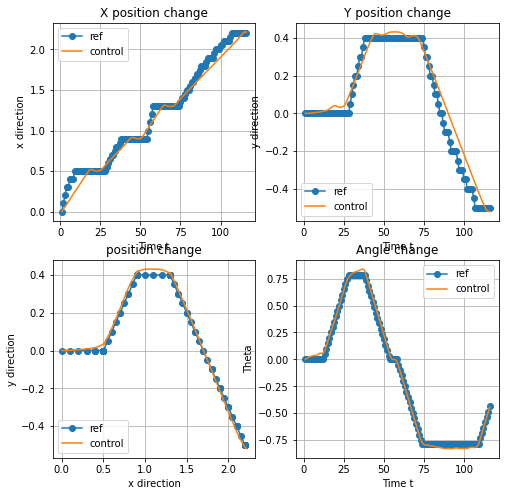

Point 104 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.38539816]
0.01743529922047379 [ 2.2        -0.5        -0.38539816] [ 2.20537867 -0.5146127  -0.39324218] [-0.09456471  0.49999978]


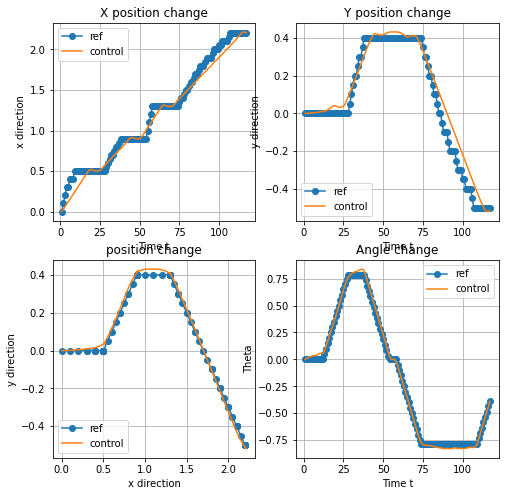

Point 105 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.33539816]
0.014628351944197296 [ 2.2        -0.5        -0.33539816] [ 2.19991762 -0.51234718 -0.3432422 ] [-0.05912325  0.49999977]


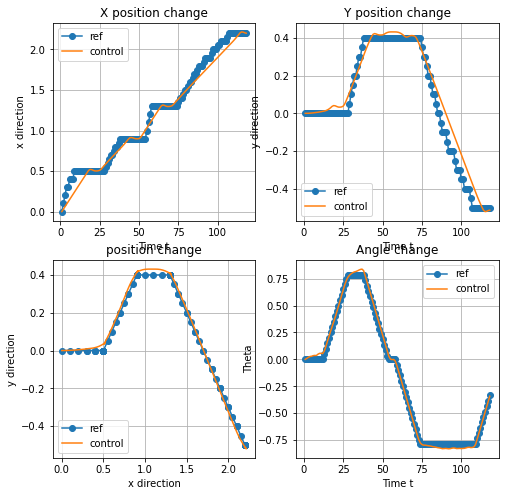

Point 106 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.28539816]
0.01469666002760253 [ 2.2        -0.5        -0.28539816] [ 2.2001423  -0.51242748 -0.29324223] [0.00238592 0.49999977]


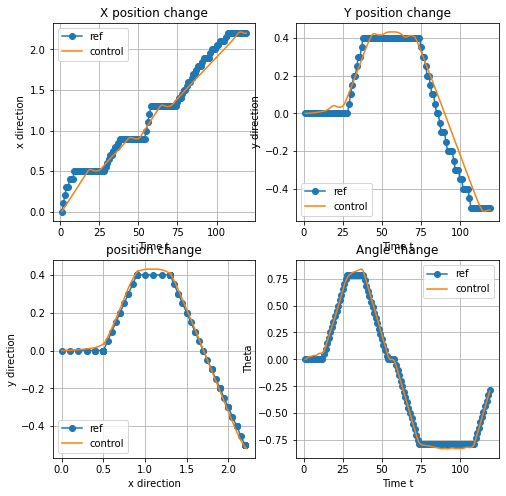

Point 107 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.23539816]
0.01578365120515873 [ 2.2        -0.5        -0.23539816] [ 2.20313829 -0.51333211 -0.24324225] [0.03129583 0.49999977]


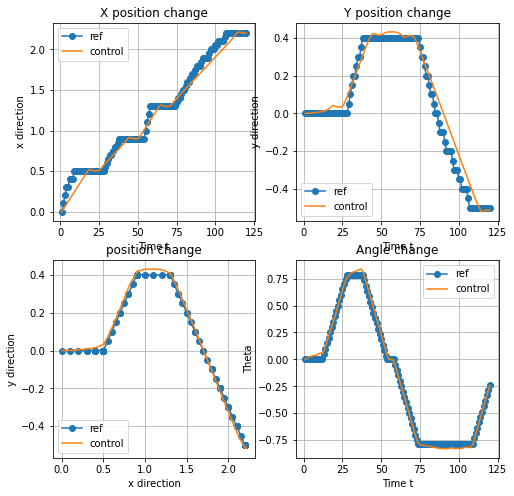

Point 108 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.18539816]
0.01680717990764959 [ 2.2        -0.5        -0.18539816] [ 2.20532996 -0.51387599 -0.19324226] [0.02258154 0.49999995]


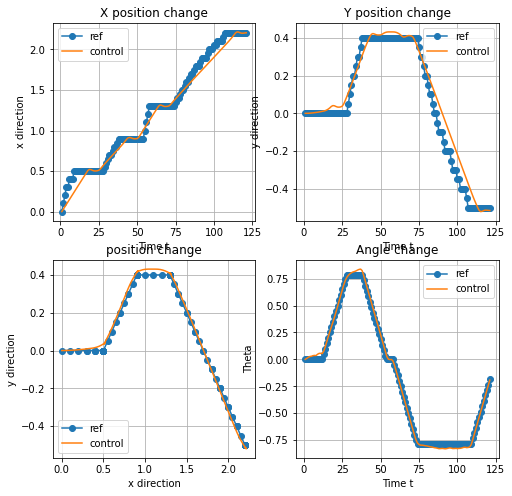

Point 109 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.13539816]
0.026461245580820136 [ 2.2        -0.5        -0.13539816] [ 2.21908375 -0.51656738 -0.14324226] [0.14014644 0.49999999]


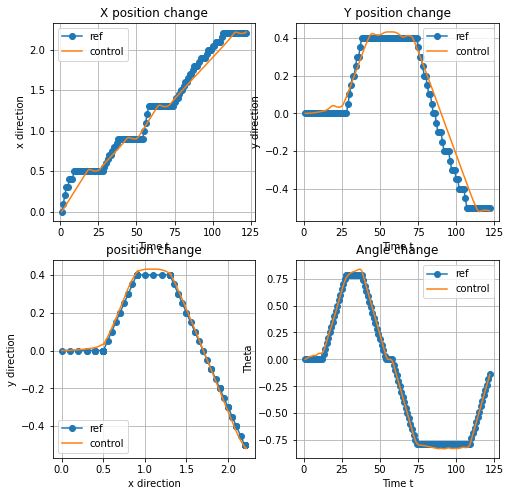

Point 110 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.08539816]
0.05362272954368291 [ 2.2        -0.5        -0.08539816] [ 2.2487765  -0.52084997 -0.09324223] [0.29999995 0.50000028]


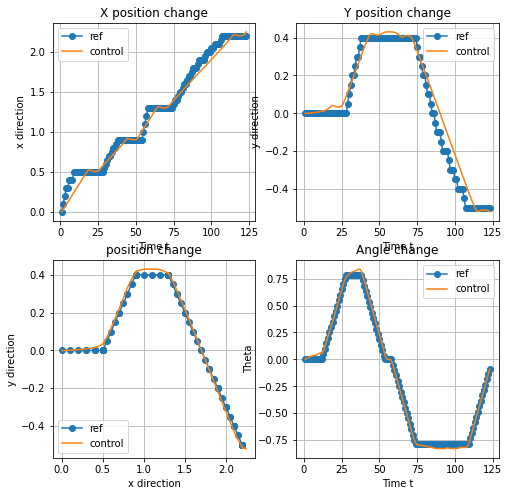

Point 111 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2        -0.5        -0.03539816]
0.08249698989624588 [ 2.2        -0.5        -0.03539816] [ 2.27864619 -0.52364319 -0.04324223] [0.30000015 0.5       ]


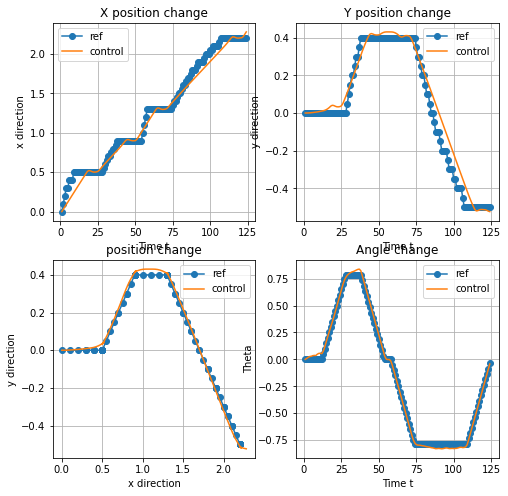

Point 112 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.2 -0.5  0. ]
0.11150284915878278 [ 2.2 -0.5  0. ] [ 2.30861815 -0.52494005  0.00360236] [0.3        0.46844584]


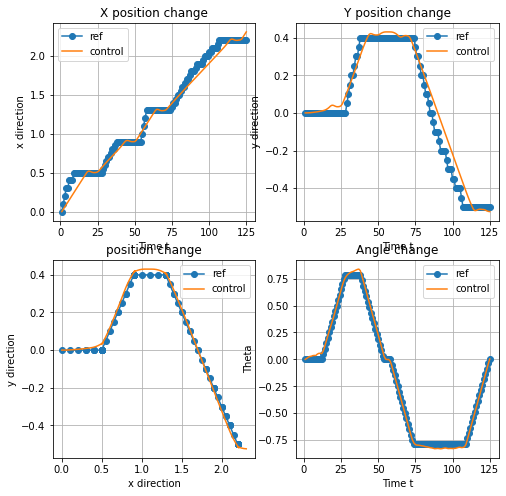

Point 113 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.3 -0.5  0. ]
0.05459072698909276 [ 2.3 -0.5  0. ] [ 2.33861795 -0.52483198  0.02953259] [0.3        0.25930234]


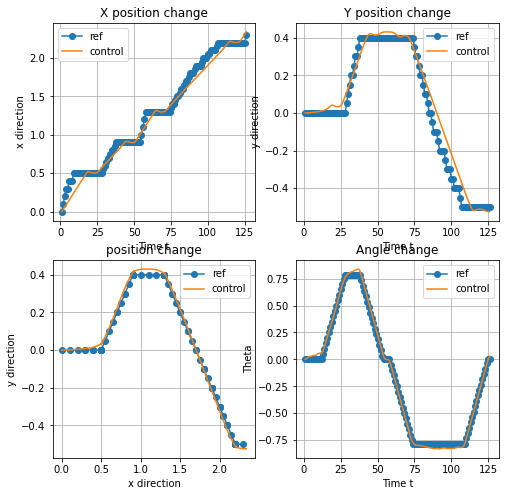

Point 114 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.4 -0.5  0. ]
0.056864596212911366 [ 2.4 -0.5  0. ] [ 2.36860487 -0.52394613  0.04092079] [0.3        0.11388201]


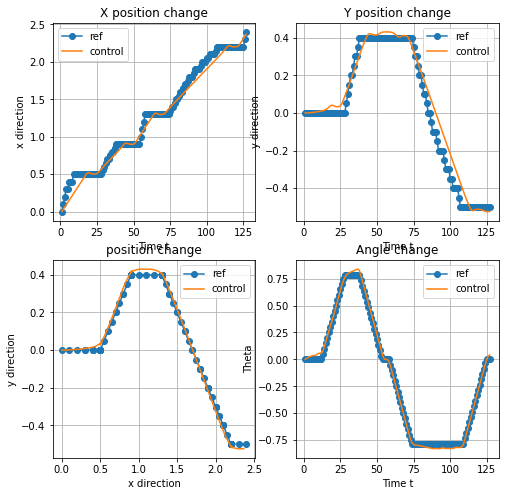

Point 115 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.5 -0.5  0. ]
0.11522644476747834 [ 2.5 -0.5  0. ] [ 2.39857976 -0.52271885  0.04974859] [0.3        0.08827798]


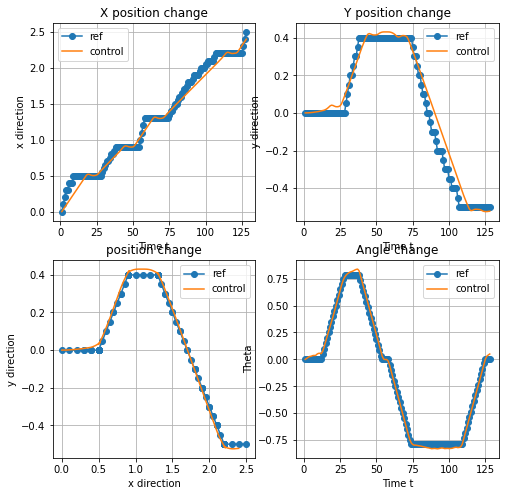

Point 116 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6 -0.5  0. ]
0.18576182119471646 [ 2.6 -0.5  0. ] [ 2.42854264 -0.52122701  0.06825865] [0.3        0.18510058]


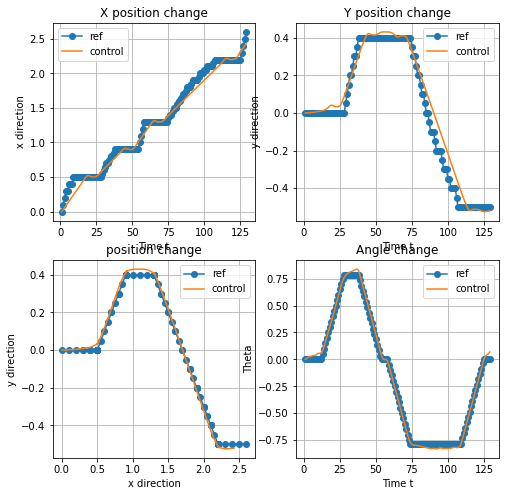

Point 117 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6  -0.5   0.05]
0.1532824363471886 [ 2.6  -0.5   0.05] [ 2.45847278 -0.51918084  0.10565651] [0.3        0.37397862]


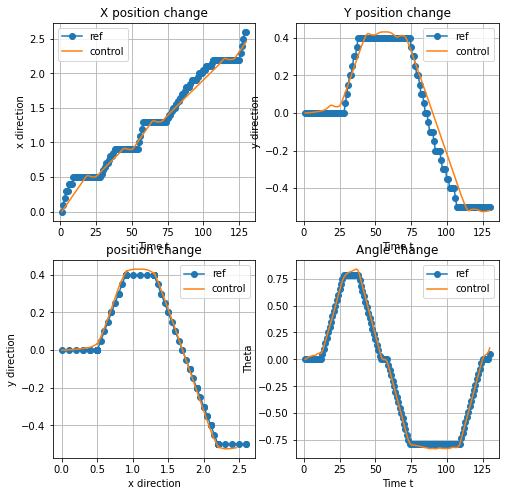

Point 118 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6 -0.5  0.1]
0.12497924924082045 [ 2.6 -0.5  0.1] [ 2.48830549 -0.51601704  0.15373643] [0.30000001 0.48079916]


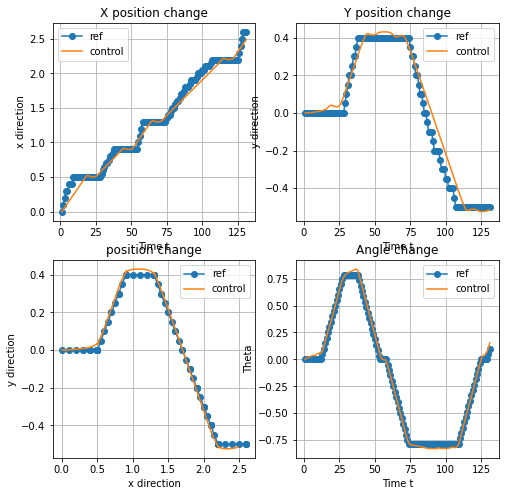

Point 119 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6  -0.5   0.15]
0.09841019461568672 [ 2.6  -0.5   0.15] [ 2.51795165 -0.51142309  0.20312389] [0.29999989 0.49387467]


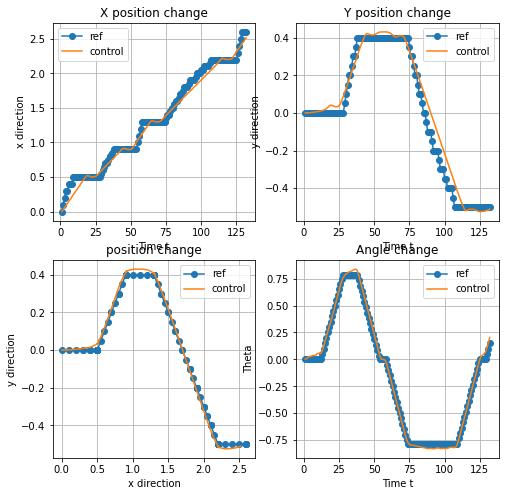

Point 120 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6 -0.5  0.2]
0.07333082310934462 [ 2.6 -0.5  0.2] [ 2.54733489 -0.50537119  0.25074392] [0.29999999 0.4762003 ]


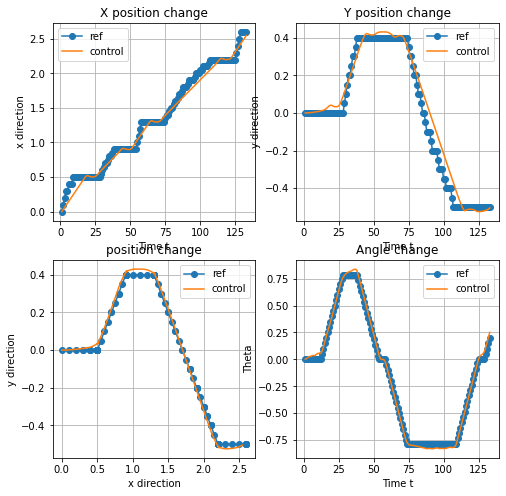

Point 121 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6  -0.5   0.25]
0.05273481767700155 [ 2.6  -0.5   0.25] [ 2.57639673 -0.49792745  0.29711211] [0.3       0.4636819]


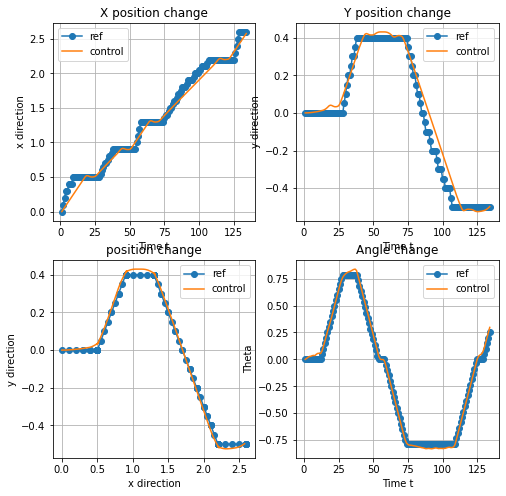

Point 122 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6 -0.5  0.3]
0.04451830164880747 [ 2.6 -0.5  0.3] [ 2.60508232 -0.48914464  0.34287436] [0.30000014 0.45762244]


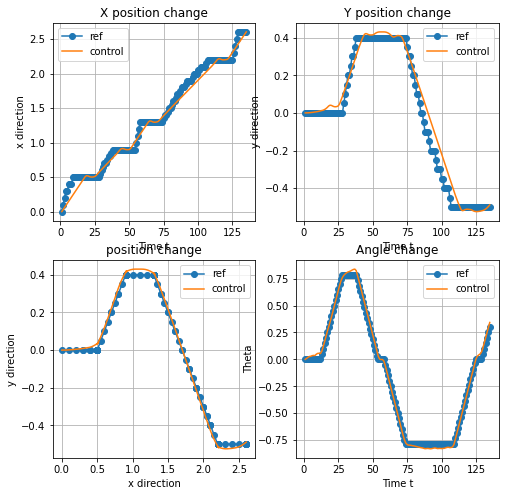

Point 123 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6  -0.5   0.35]
0.05257349690150512 [ 2.6  -0.5   0.35] [ 2.63032297 -0.48013439  0.38807686] [0.26800652 0.45202508]


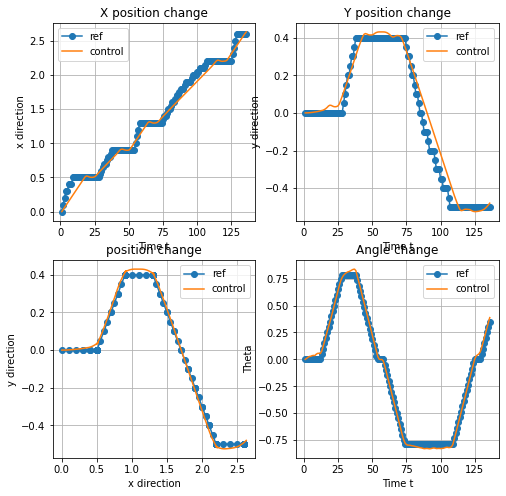

Point 124 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6 -0.5  0.4]
0.05496986164546554 [ 2.6 -0.5  0.4] [ 2.63756954 -0.47717192  0.43300142] [0.07828734 0.44924558]


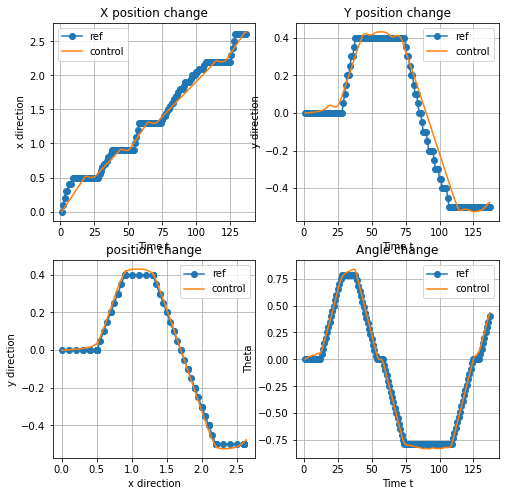

Point 125 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6  -0.5   0.45]
0.04820894548712138 [ 2.6  -0.5   0.45] [ 2.63160234 -0.47993031  0.48037437] [-0.06573907  0.47372946]


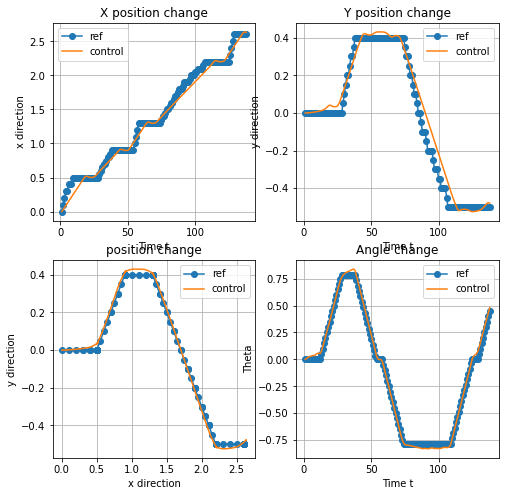

Point 126 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6 -0.5  0.5]
0.041323785880269824 [ 2.6 -0.5  0.5] [ 2.62320948 -0.48430372  0.53037437] [-0.09463975  0.5       ]


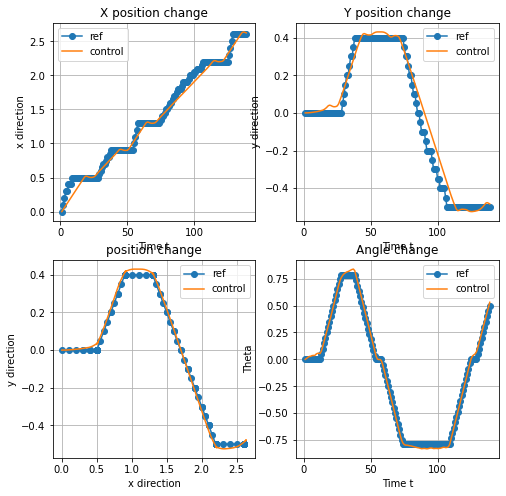

Point 127 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6  -0.5   0.55]
0.038036056575015194 [ 2.6  -0.5   0.55] [ 2.61877746 -0.48690275  0.58037451] [-0.05137877  0.50000142]


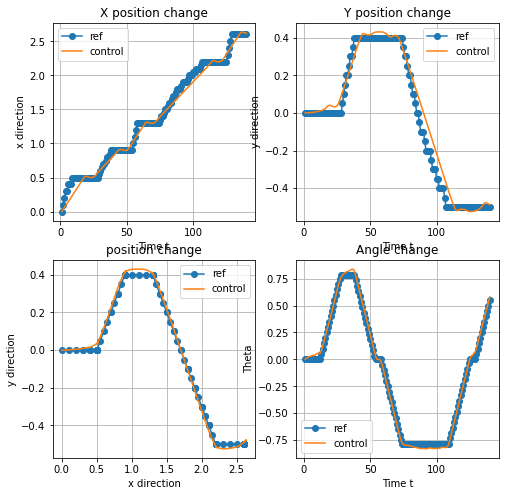

Point 128 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6 -0.5  0.6]
0.03813198768783581 [ 2.6 -0.5  0.6] [ 2.61891035 -0.48681561  0.63037464] [0.00158919 0.50000133]


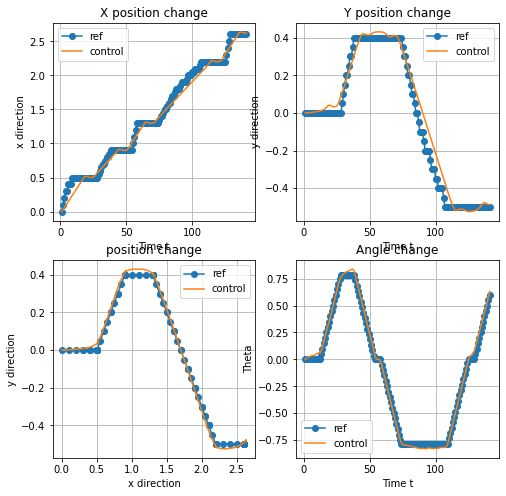

Point 129 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6  -0.5   0.65]
0.04290123209240205 [ 2.6  -0.5   0.65] [ 2.62476318 -0.48254487  0.68037464] [0.07245333 0.5       ]


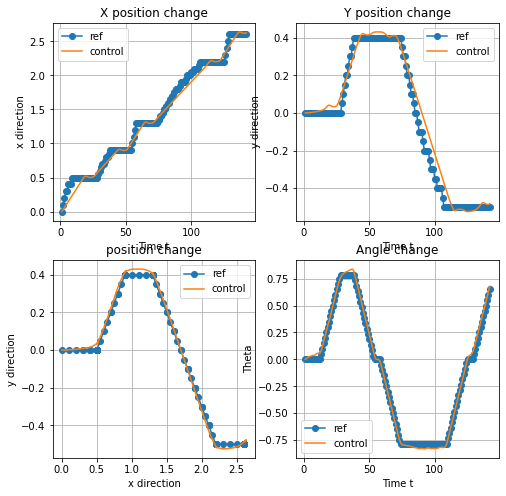

Point 130 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6 -0.5  0.7]
0.058783117455909153 [ 2.6 -0.5  0.7] [ 2.64119075 -0.46925034  0.72851728] [0.2113314  0.48142634]


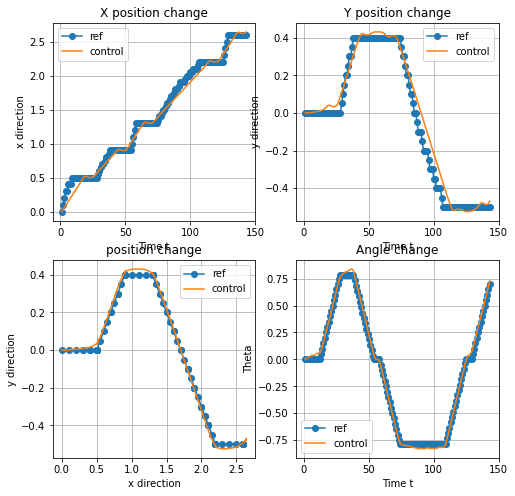

Point 131 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6  -0.5   0.75]
0.08358086128776995 [ 2.6  -0.5   0.75] [ 2.66344328 -0.44939551  0.76999741] [0.29822627 0.41480133]


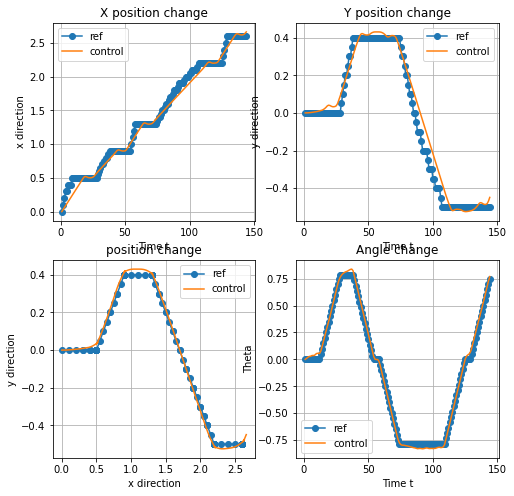

Point 132 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.6        -0.5         0.78539816]
0.11189674302241621 [ 2.6        -0.5         0.78539816] [ 2.68498065 -0.42851151  0.79913007] [0.3        0.29132665]


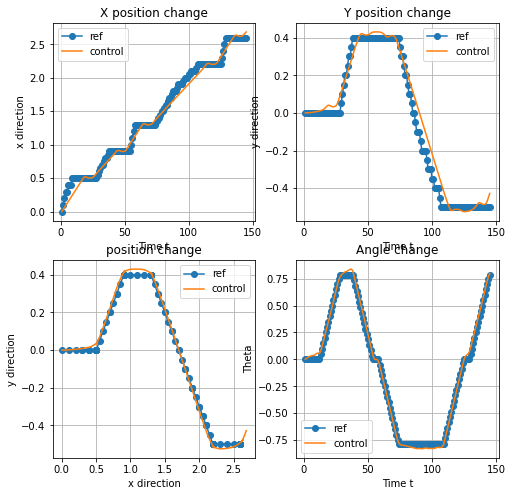

Point 133 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.65       -0.45        0.78539816]
0.0767952287540749 [ 2.65       -0.45        0.78539816] [ 2.70590054 -0.40700904  0.81580233] [0.29999969 0.16672256]


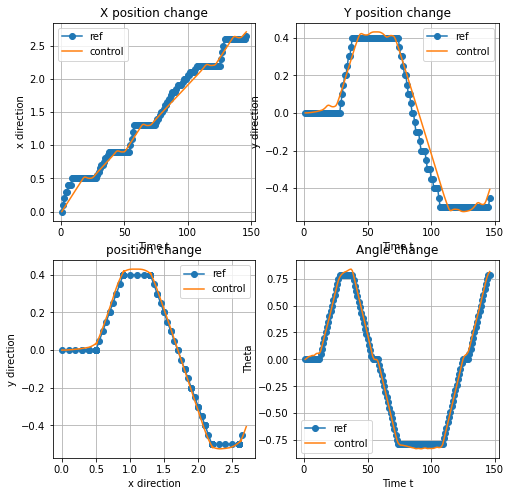

Point 134 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.7        -0.4         0.78539816]
0.049391985451215675 [ 2.7        -0.4         0.78539816] [ 2.72645908 -0.38516076  0.82437613] [0.30000011 0.08573803]


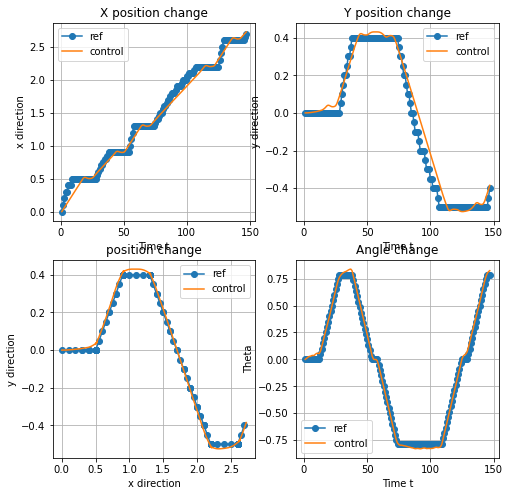

Point 135 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.7        -0.4         0.78539816]
0.07370189998655126 [ 2.7        -0.4         0.78539816] [ 2.7468296  -0.36313696  0.82875799] [0.300001   0.04381856]


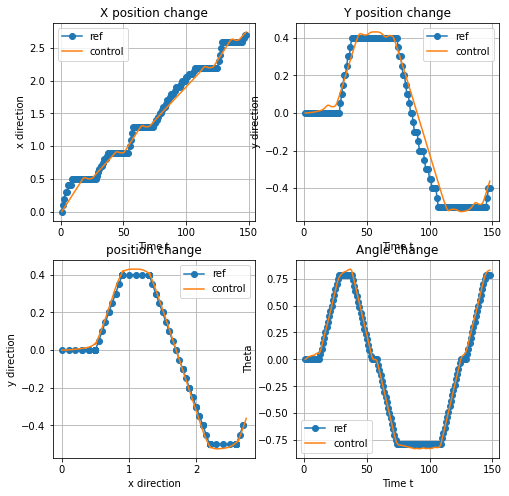

Point 136 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.75       -0.35        0.78539816]
0.05245696347229154 [ 2.75       -0.35        0.78539816] [ 2.76710335 -0.34102418  0.8341695 ] [0.3        0.05411507]


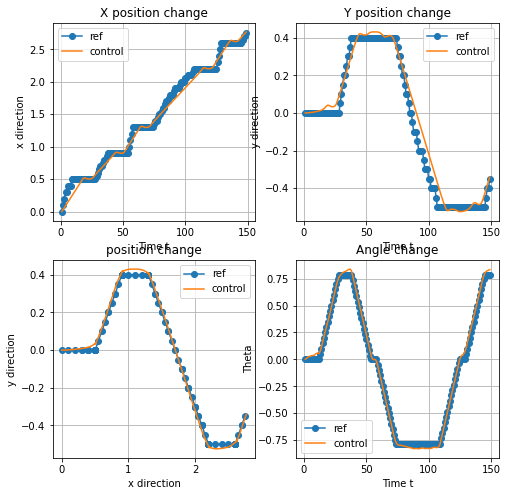

Point 137 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.8        -0.3         0.78539816]
0.05678751982273613 [ 2.8        -0.3         0.78539816] [ 2.78725714 -0.31880202  0.83744551] [0.29999995 0.03276012]


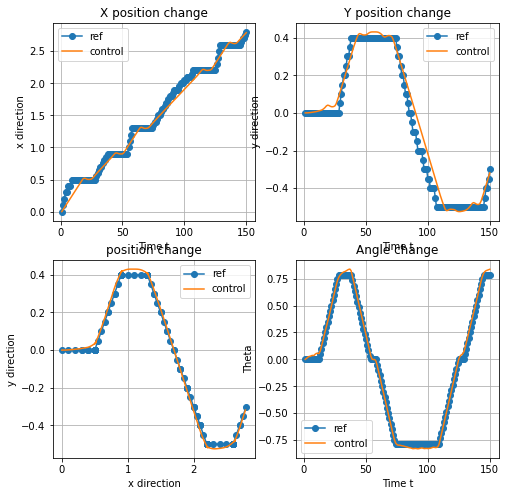

Point 138 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.8        -0.3         0.78539816]
0.05183114402425996 [ 2.8        -0.3         0.78539816] [ 2.80733822 -0.29651374  0.83658863] [ 0.30000279 -0.00856877]


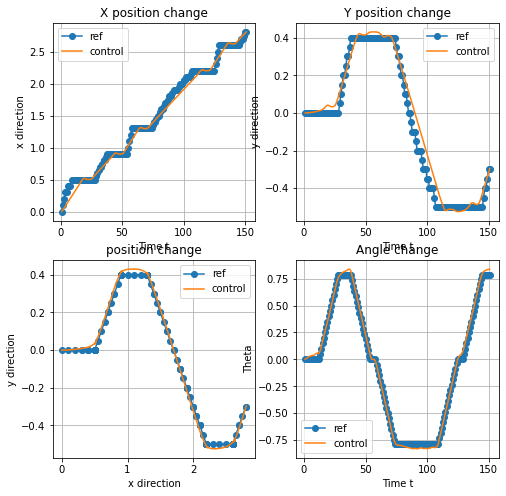

Point 139 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.8        -0.3         0.78539816]
0.06392700525543647 [ 2.8        -0.3         0.78539816] [ 2.82743819 -0.27424288  0.83707387] [0.3        0.00485238]


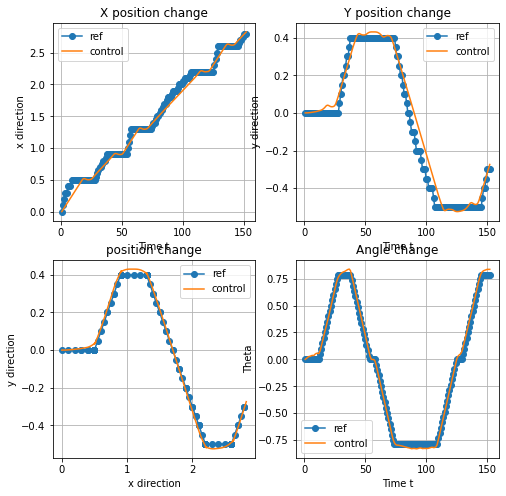

Point 140 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.85       -0.25        0.78539816]
0.056544610735365576 [ 2.85       -0.25        0.78539816] [ 2.84752748 -0.25196214  0.8418546 ] [0.30000182 0.04780733]


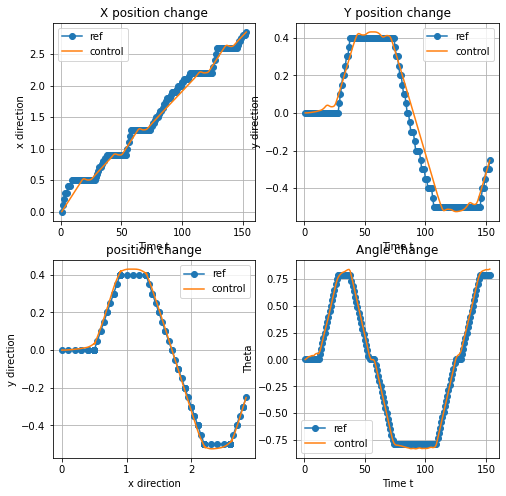

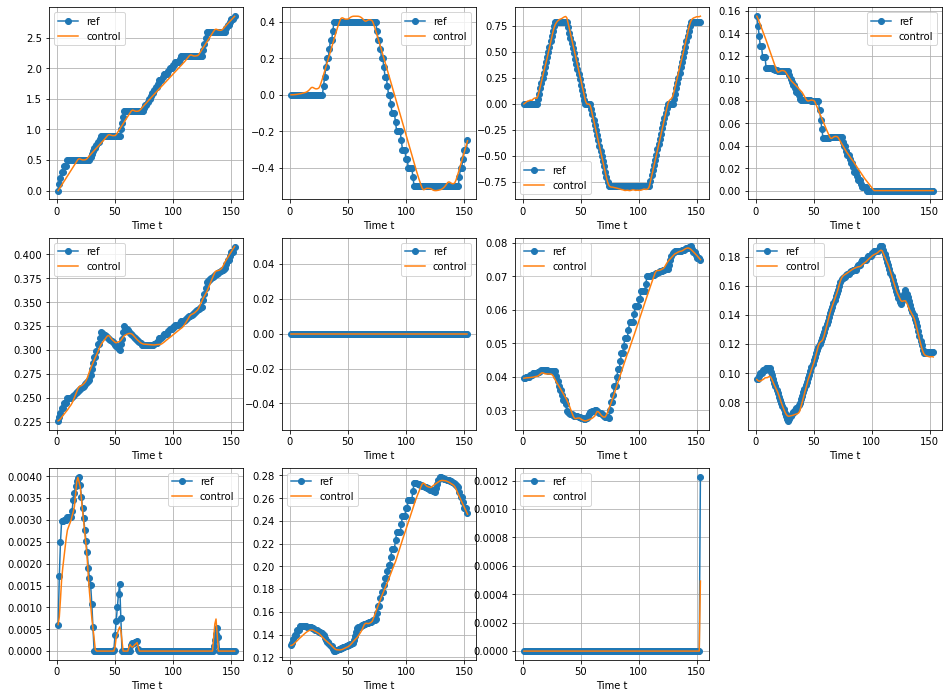

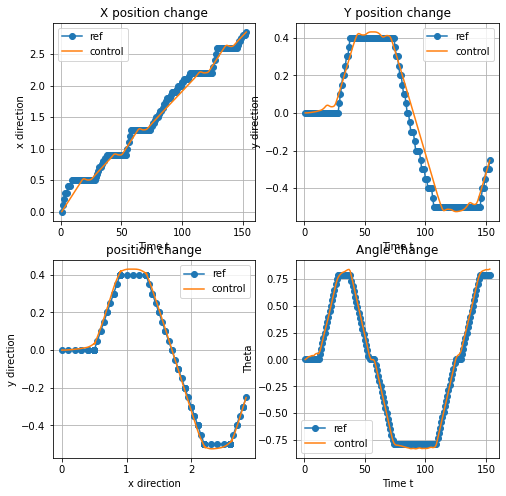

Average time needed per step is 18.20278157894587 ms.
MSE loss: 0.012175372837047895
Controled path file: Q-[100. 100.  10.  10.  10.  10.  10.  10.  10.  10.  10.]_R-[0.2 0.1]_rho-0.01_Nc-5
Total time needed is 56469.307700000056 ms.


In [4]:
# get augmented matrices
model_file = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
Q = 100*np.diag(np.array([1.,1.,.1,.1,.1,.1,.1,.1,.1,.1,.1]))
R = 0.1*np.diag(np.array([2.,1.]))
rho = 0.01
# Np = 6
Nc = 5
thre = 0.2
ref = np.load(path+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
u_init = np.array([0.,0.])#1.5*10*np.pi/SimLength,-10*np.pi/SimLength])
t1 = time.perf_counter()
file_name = MPC_control_process(model_file,path_ref,u_init,x_init,Q,R,rho,Nc,thre)
t2 = time.perf_counter()
print("Total time needed is "+str(1000*(t2-t1))+" ms.")

In [ ]:
control_files = [file_name]
ref_file = 'SimLenth_200_Ts_0.1'
MPC_result_plot(ref_file,control_files,Nc)

In [ ]:
from LQR import *
from numpy import pi
import numpy as np
SimLength = 30
init_x = np.array([0.,0.,0.])
path=simulate_path(init_x,SimLength)
model_file = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
ref = np.load(path+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
Q = 100*np.diag(np.array([10.,10.,1.,1.,1.,1.,1.,1.,1.,1.,1.]))
R = 1*np.diag(np.array([2.,1.]))
thre = 10
LQR_control_process(model_file,path_ref,x_init,Q,R,thre)

In [ ]:
(np.ones((1,5))-np.tri(1,5,0))[0]

In [ ]:
import numpy as np
from Koopman_numpy import Koopman_numpy
from MPC import *

SimLength = 8
init_x = np.array([0.,0.,0.])
file=simulate_path(init_x,SimLength)
ref = np.load(file+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
diff = path_ref[:,1:]-path_ref[:,:-1]
angle = np.arctan2(diff[1,:],diff[0,:])
path_ref = np.r_[path_ref,np.c_[x_init[2],np.array([angle])]]

In [ ]:
file_name = 'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((9,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/lower_complex/ref_4',lifted_ref)


file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 11]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/complex/ref_4',lifted_ref)


file_name = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/unmasked/ref_4',lifted_ref)


file_name = 'real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/diagonal/ref_4',lifted_ref)

In [ ]:
import numpy as np
ref = np.random.rand(3,2)
print(ref)
temp = np.zeros((3,0))
temp = np.c_[temp,ref[:,0]]
for i in range(1,ref.shape[1]):
    if ref[2,i]!=ref[2,i-1]:
        temp = np.c_[temp,[ref[0,i-1],ref[1,i-1],ref[2,i]]]
    temp = np.c_[temp,ref[:,i]]
ref = temp
print(ref)

In [ ]:
u_max = np.array([1.5,0.5])
u_range = np.eye(2)
for i in range(1,5):
    u_range = np.c_[u_range,np.eye(2)]
print(u_max@u_range)